In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os, pickle
import math
import random
import pprint
import numpy as np
import cv2
sys.path.append('../..')

from mrcnn.utils       import command_line_parser, Paths
from mrcnn.visualize   import display_images
from mrcnn.dataset     import Dataset
from mrcnn.datagen     import load_image_gt
from importlib         import reload
from mrcnn.newshapes2  import NewImagesConfig, NewImagesDataset
# from mrcnn.newshapes2  import NewImagesDataset
import mrcnn.prep_notebook as prep
import mrcnn.visualize     as visualize
import mrcnn.visualize_2   as vis2
import mrcnn.utils         as utils

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)
import tensorflow as tf
import keras
print("    Tensorflow Version: {}   Keras Version : {} ".format(tf.__version__,keras.__version__))
 
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = command_line_parser()
input_parms = " --batch_size 1  "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
input_parms +=" --scale_factor     1"
# input_parms +=" --mrcnn_model    last "
# input_parms +=" --sysout        screen "
# input_parms +=" --new_log_folder   "
print(input_parms)
args = parser.parse_args(input_parms.split())
# config = prep.build_newshapes_config(model = 'mrcnn', args = args, mode = 'training', shapes = 'newshapes2', verbose= 0)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
    Tensorflow Version: 1.10.0   Keras Version : 2.2.2 
 --batch_size 1   --mrcnn_logs_dir train_mrcnn_newshapes  --scale_factor     1


In [4]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%10d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [5]:
# del dataset_test
# pp.pprint(sys.modules)
# reload(mrcnn.Image)
# from mrcnn.Image import Image
# from IPython.lib.deepreload import reload
# reload(MyPak) 
# pp.pprint(sys.modules)

### Load newshape2 dataset from file and display

In [ ]:
import os, pickle
with open ('E:\\git_projs\\MRCNN3\\train_newshapes_2\\newshapes2_test_dataset_2500_A.pkl', 'rb') as outfile:
    dataset_test = pickle.load(outfile)
print(len(dataset_test.image_ids), len(dataset_test.image_info))
# dataset_train.display_active_class_info()
# pp.pprint(dataset_test.class_from_source_map)
# pp.pprint(dataset_test.class_info)

In [ ]:
image_list = dataset_test.image_ids.tolist()[:35] ## [-4:]
dataset_test.display_image(image_list, grid = False)

###  Save newshape2 dataset to file

In [33]:
import pickle
with open('E:\\git_projs\\MRCNN3\\train_newshapes_2\\newshapes2_training_dataset_15000_A.pkl', 'wb') as outfile:
    pickle.dump(dataset_test, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes_2\\newshapes2_validation_dataset_2500_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
# with open('E:\\git_projs\\MRCNN3\\train_newshapes_2\\newshapes2_test_dataset_1000_A.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)

### Build newshape2 file

In [29]:
# del NewImagesDataset
try:
    del sys.modules['mrcnn.newshapes2'],sys.modules['mrcnn.Image']
except:
    pass
from mrcnn.newshapes2 import NewImagesDataset, NewImagesConfig

try:
    del config
except:
    pass
try:
    del dataset_test
except:
    print(' dataset_test doesnt exist ')

 Init Image Class - Possible Object Choices:  {'tree': 5, 'truck': 3, 'airplane': 3, 'car': 3, 'sun': 1, 'cloud': 3, 'person': 5, 'building': 3}
 Init Image Class - Custom Color Keys      :  ['person', 'cloud', 'tree', 'sun', 'sky', 'ground']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - person_car_gap         :  10


In [30]:
config = NewImagesConfig()
# config.display()
dataset_test  = NewImagesDataset(config)

Active Class Info in  newshapes2
------------------------------------
[   {'category': 'background', 'id': 0, 'img_count': 0, 'name': 'BG', 'source': ''},
    {'category': None, 'id': 1, 'img_count': 0, 'name': 'person', 'source': 'newshapes2'},
    {'category': None, 'id': 2, 'img_count': 0, 'name': 'car', 'source': 'newshapes2'},
    {'category': None, 'id': 3, 'img_count': 0, 'name': 'sun', 'source': 'newshapes2'},
    {'category': None, 'id': 4, 'img_count': 0, 'name': 'building', 'source': 'newshapes2'},
    {'category': None, 'id': 5, 'img_count': 0, 'name': 'tree', 'source': 'newshapes2'},
    {'category': None, 'id': 6, 'img_count': 0, 'name': 'cloud', 'source': 'newshapes2'},
    {'category': None, 'id': 7, 'img_count': 0, 'name': 'airplane', 'source': 'newshapes2'},
    {'category': None, 'id': 8, 'img_count': 0, 'name': 'truck', 'source': 'newshapes2'}]


In [31]:
dataset_test.load_images(15000, verbose =  False)
dataset_test.prepare()

 Dataset test currently has : 0  images defined...
 Adding  15000 images
 Add image --->  0
-----------------------------
 Add image --->  25
-----------------------------
 Add image --->  50
-----------------------------
 Add image --->  75
-----------------------------
 Add image --->  100
-----------------------------
 Add image --->  125
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 140.0, 0.0), (104, 11, 5, 5)),
        ('cloud', (192.0, 192.0, 192.0), (109, 9, 12, 4)),
        ('cloud', (119.0, 136.0, 153.0), (76, 17, 37, 7)),
        ('cloud', (211.0, 211.0, 211.0), (24, 28, 35, 11)),
        ('building', (180.0, 240.0, 73.0), (62, 35, 26, 21)),
        ('building', (251.0, 20.0, 193.0), (23, 36, 13, 20)),
        ('building', (150.0, 217.0, 38.0), (78, 38, 28, 20)),
        ('tree', (50.0, 205.0, 50.0), (66, 49, 9, 22)),
        ('tree', (50.0, 205.0, 50.0), (74, 50, 10, 23)),
        ('car', (176.0, 7.0, 212.0), (62, 69,

 Add image --->  825
-----------------------------
 Add image --->  850
-----------------------------
 Add image --->  875
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  881
  Selected objects :  ['cloud', 'cloud', 'cloud', 'sun', 'person']
  Cannot build  cloud  object due to occlusion...
  Occlusions encountered:   [0.8355 0.9246 0.9023 0.9242 0.8238 0.8798 0.9552]
  lowest car       :  124  highest car       : 94
  leftmost car     :  24  rightmost car     : 129
  lowest building  :  75  highest building  : 35
  leftmost building:  89  rightmost building: 113
   0  building         cx:  101  cy:  55  sx:  12  sy:  20    
   1  tree             cx:  125  cy:  92  sx:  13  sy:  30    
   2  car              cx:  106  cy: 113  sx:  23  sy:  11    
   3  car              cx:   45  cy: 104  sx:  21  sy:  10    
   4  cloud            cx:   91  cy:  23  sx:  49  sy:   9    
   5  clo

 Add image --->  1275
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 255.0, 224.0), (120, 25, 10, 10)),
        ('cloud', (211.0, 211.0, 211.0), (11, 12, 16, 5)),
        ('cloud', (192.0, 192.0, 192.0), (65, 18, 39, 7)),
        ('cloud', (119.0, 136.0, 153.0), (128, 20, 34, 8)),
        ('building', (184.0, 57.0, 38.0), (40, 26, 29, 23)),
        ('building', (246.0, 82.0, 20.0), (99, 25, 21, 25)),
        ('building', (46.0, 102.0, 61.0), (81, 33, 16, 24)),
        ('tree', (128.0, 128.0, 0.0), (116, 49, 8, 18)),
        ('car', (174.0, 169.0, 248.0), (37, 60, 14, 7)),
        ('car', (211.0, 62.0, 33.0), (70, 60, 14, 7)),
        ('person', (160.0, 82.0, 45.0), (13, 60, 1, 8)),
        ('tree', (34.0, 139.0, 34.0), (107, 50, 8, 19)),
        ('tree', (154.0, 205.0, 50.0), (96, 60, 12, 28)),
        ('car', (236.0, 137.0, 167.0), (63, 101, 22, 11)),
        ('person', (0.0, 0.0, 0.0), (31, 101, 2, 12))]
 ****** objects complete

 Add image --->  1650
-----------------------------
 Add image --->  1675
-----------------------------
 Add image --->  1700
-----------------------------
 Add image --->  1725
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  1744
  Selected objects :  ['cloud', 'tree', 'tree', 'sun', 'tree', 'cloud', 'person']
  Cannot build  building  object due to occlusion...
  Occlusions encountered:   [0.8667 0.8302 0.8085 0.8352 0.8788 0.9792 0.7565]
  lowest car       :  61  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  74  highest building  : 17
  leftmost building:  38  rightmost building: 130
   0  building         cx:  105  cy:  54  sx:  25  sy:  17    
   1  building         cx:   73  cy:  50  sx:  26  sy:  24    
  -------------------------------------------------------------------------------------------

 Add image --->  1750
--------

 Add image --->  2175
-----------------------------
 Add image --->  2200
-----------------------------
 Add image --->  2225
-----------------------------
 Add image --->  2250
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  2274
  Selected objects :  ['person', 'person', 'person', 'cloud', 'truck', 'cloud', 'airplane', 'cloud', 'sun', 'airplane', 'airplane', 'truck', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [0.9763 0.8559 0.9172 1.0000 1.0000 1.0000 0.9915]
  lowest car       :  81  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  81  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   46  cy:  84  sx:   8  sy:  18    
   1  person           cx:   87  cy: 107  sx:   2  sy:  11    
   2  person           cx:    2  cy: 112  sx:   2  sy:  

 ===> find hidden shapes() found hidden objects 
[       ('cloud', (255.0, 255.0, 255.0), (15, 23, 49, 9)),
        ('tree', (154.0, 205.0, 50.0), (15, 41, 3, 9)),
        ('building', (43.0, 190.0, 127.0), (100, 37, 23, 15)),
        ('building', (67.0, 172.0, 157.0), (69, 31, 19, 23)),
        ('building', (81.0, 141.0, 179.0), (108, 33, 19, 24)),
        ('person', (160.0, 82.0, 45.0), (85, 61, 1, 8)),
        ('car', (2.0, 86.0, 146.0), (119, 68, 16, 8)),
        ('person', (210.0, 180.0, 140.0), (93, 68, 1, 9)),
        ('tree', (154.0, 205.0, 50.0), (6, 59, 10, 24)),
        ('tree', (0.0, 100.0, 0.0), (17, 59, 10, 24)),
        ('person', (240.0, 230.0, 140.0), (10, 88, 2, 10)),
        ('person', (210.0, 180.0, 140.0), (53, 115, 2, 13))]
 ****** objects completely hidden are :  [2]
('building', (43.0, 190.0, 127.0), (100, 37, 23, 15))
-----------------------------------------------------------------
    ===> Image Id : ( 2501 )   ---- Zero Mask Encountered 
--------------------

 Add image --->  2875
-----------------------------
 Add image --->  2900
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 215.0, 0.0), (53, 22, 9, 9)),
        ('cloud', (248.0, 248.0, 255.0), (47, 13, 29, 5)),
        ('cloud', (255.0, 250.0, 250.0), (115, 13, 17, 5)),
        ('cloud', (211.0, 211.0, 211.0), (72, 28, 35, 11)),
        ('building', (191.0, 182.0, 41.0), (24, 28, 29, 22)),
        ('building', (103.0, 15.0, 115.0), (84, 38, 24, 22)),
        ('building', (235.0, 5.0, 210.0), (45, 46, 24, 15)),
        ('tree', (0.0, 128.0, 0.0), (7, 49, 8, 18)),
        ('car', (165.0, 112.0, 201.0), (123, 70, 16, 8)),
        ('person', (210.0, 180.0, 140.0), (97, 70, 1, 9)),
        ('tree', (0.0, 100.0, 0.0), (19, 61, 12, 29)),
        ('car', (67.0, 203.0, 70.0), (71, 98, 21, 10)),
        ('car', (5.0, 214.0, 67.0), (93, 106, 23, 11))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 215.0, 0.0), (53, 22, 9, 9))
--

 Add image --->  3300
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 215.0, 0.0), (50, 22, 9, 9)),
        ('cloud', (255.0, 250.0, 250.0), (53, 17, 22, 7)),
        ('cloud', (211.0, 211.0, 211.0), (124, 20, 43, 8)),
        ('cloud', (119.0, 136.0, 153.0), (27, 27, 34, 11)),
        ('building', (23.0, 122.0, 53.0), (108, 48, 20, 18)),
        ('tree', (46.0, 139.0, 87.0), (73, 70, 8, 19)),
        ('car', (222.0, 197.0, 0.0), (90, 82, 16, 8)),
        ('tree', (128.0, 128.0, 0.0), (89, 71, 9, 20)),
        ('tree', (107.0, 142.0, 35.0), (82, 76, 10, 23)),
        ('car', (180.0, 167.0, 58.0), (61, 110, 23, 11)),
        ('person', (139.0, 69.0, 19.0), (28, 110, 2, 12)),
        ('car', (211.0, 104.0, 27.0), (85, 117, 24, 12)),
        ('person', (0.0, 0.0, 0.0), (51, 117, 2, 13))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 215.0, 0.0), (50, 22, 9, 9))
-----------------------------------------------------------


  -------------------------------------------------------------------------------------------
  Problem in building image  3761
  Selected objects :  ['cloud', 'sun', 'truck', 'truck', 'cloud', 'airplane', 'cloud', 'truck', 'person', 'person', 'person', 'airplane', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 1.0000 0.8983 0.8876 1.0000 1.0000]
  lowest car       :  70  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  70  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:  112  cy:  68  sx:   5  sy:  13    
   1  tree             cx:   95  cy:  63  sx:   4  sy:  10    
   2  cloud            cx:   65  cy:  25  sx:  53  sy:  10    
   3  sun              cx:   96  cy:   9  sx:   4  sy:   4    
   4  truck            cx:   96  cy:  95  sx:  31  sy:  10    
   5  truck            cx:   46  cy:  74  sx:  31  sy:   7    
   6  cloud    


  -------------------------------------------------------------------------------------------
  Problem in building image  3979
  Selected objects :  ['person', 'truck', 'person', 'truck', 'truck', 'cloud', 'sun', 'cloud', 'person', 'person', 'cloud', 'airplane']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 1.0000 1.0000 0.9237 1.0000 1.0000]
  lowest car       :  83  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  83  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   68  cy:  96  sx:  12  sy:  28    
   1  tree             cx:   77  cy:  95  sx:  11  sy:  27    
   2  person           cx:   85  cy: 112  sx:   2  sy:  12    
   3  truck            cx:  104  cy:  99  sx:  30  sy:  10    
   4  person           cx:   95  cy:  96  sx:   1  sy:   9    
   5  truck            cx:   69  cy: 112  sx:  49  sy:  12    
   6  truck            cx: 

 Add image --->  4550
-----------------------------
 Add image --->  4575
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  4598
  Selected objects :  ['airplane', 'person', 'person', 'cloud', 'airplane', 'sun', 'truck', 'person', 'airplane', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 0.9074 1.0000 0.9158 0.9763 1.0000 1.0000]
  lowest car       :  58  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  58  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   12  cy:  70  sx:  10  sy:  24    
   1  tree             cx:   28  cy:  63  sx:   8  sy:  19    
   2  tree             cx:    5  cy:  49  sx:   3  sy:   9    
   3  tree             cx:    0  cy:  57  sx:   6  sy:  15    
   4  airplane         cx:   61  cy:  22  sx:  18  sy:   7   

 Add image --->  4875
-----------------------------
 Add image --->  4900
-----------------------------
 Add image --->  4925
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  4945
  Selected objects :  ['cloud', 'truck', 'cloud', 'cloud', 'sun', 'airplane', 'person', 'person', 'airplane']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 1.0000 1.0000 0.8534 0.8762 1.0000]
  lowest car       :  52  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  52  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:  123  cy:  49  sx:   5  sy:  13    
   1  tree             cx:  103  cy:  51  sx:   6  sy:  15    
   2  tree             cx:  100  cy:  60  sx:   9  sy:  22    
   3  tree             cx:  107  cy:  64  sx:  11  sy:  25    
   4  tree             

 Add image --->  5300
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  5308
  Selected objects :  ['sun', 'cloud', 'truck', 'person', 'cloud', 'cloud', 'airplane', 'person', 'person', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 0.8729 1.0000 1.0000 1.0000 0.9661]
  lowest car       :  80  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  80  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   44  cy:  81  sx:   6  sy:  16    
   1  tree             cx:   27  cy:  72  sx:   3  sy:   9    
   2  sun              cx:   43  cy:  14  sx:   6  sy:   6    
   3  cloud            cx:   47  cy:  27  sx:  57  sy:  11    
   4  truck            cx:  110  cy: 106  sx:  34  sy:  11    
   5  person           cx:  128  cy: 107  sx:   2  sy:  

 Add image --->  6125
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('cloud', (255.0, 250.0, 250.0), (122, 11, 25, 5)),
        ('cloud', (192.0, 192.0, 192.0), (26, 27, 34, 11)),
        ('tree', (46.0, 139.0, 87.0), (77, 43, 3, 9)),
        ('building', (64.0, 61.0, 96.0), (61, 38, 16, 15)),
        ('building', (2.0, 241.0, 196.0), (97, 42, 19, 18)),
        ('person', (0.0, 0.0, 0.0), (76, 77, 1, 9)),
        ('tree', (128.0, 128.0, 0.0), (99, 65, 11, 27)),
        ('car', (55.0, 76.0, 65.0), (99, 98, 21, 10)),
        ('person', (0.0, 0.0, 0.0), (68, 98, 2, 11))]
 ****** objects completely hidden are :  [2]
('tree', (46.0, 139.0, 87.0), (77, 43, 3, 9))
-----------------------------------------------------------------
    ===> Image Id : ( 6149 )   ---- Zero Mask Encountered 
-----------------------------------------------------------------
 Add image --->  6150
-----------------------------
 ===> find hidden shapes() found hidden objects 
[

 Add image --->  6500
-----------------------------
 Add image --->  6525
-----------------------------
 Add image --->  6550
-----------------------------
 Add image --->  6575
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  6596
  Selected objects :  ['cloud', 'person', 'truck', 'sun', 'cloud', 'truck', 'airplane', 'airplane', 'airplane']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [0.8935 1.0000 0.9208 0.8225 1.0000 0.9704 1.0000]
  lowest car       :  64  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  64  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   89  cy:  78  sx:  11  sy:  25    
   1  cloud            cx:  120  cy:  24  sx:  51  sy:  10    
   2  person           cx:   78  cy: 107  sx:   2  sy:  12    
   3  truck            cx:  105 

 Add image --->  7075
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  7091
  Selected objects :  ['cloud', 'person', 'sun', 'cloud', 'cloud', 'person']
  Cannot build  sun  object due to occlusion...
  Occlusions encountered:   [1.0000 0.9949 1.0000 1.0000 0.9877 0.9877 1.0000]
  lowest car       :  128  highest car       : 65
  leftmost car     :  34  rightmost car     : 93
  lowest building  :  58  highest building  : 8
  leftmost building:  11  rightmost building: 110
   0  building         cx:   83  cy:  33  sx:  27  sy:  25    
   1  building         cx:   37  cy:  31  sx:  26  sy:  23    
   2  tree             cx:   22  cy:  60  sx:  11  sy:  25    
   3  car              cx:   56  cy: 103  sx:  22  sy:  11    
   4  car              cx:   69  cy: 116  sx:  24  sy:  12    
   5  car              cx:   50  cy:  73  sx:  16  sy:   8    
   6  cloud            cx:   99  cy:  13

 Add image --->  7275
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  7278
  Selected objects :  ['cloud', 'cloud', 'airplane', 'person', 'sun', 'cloud', 'person', 'person', 'airplane', 'truck', 'truck', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 0.9322 1.0000 1.0000 1.0000 0.8364 0.9408]
  lowest car       :  70  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  70  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   70  cy:  66  sx:   4  sy:  12    
   1  cloud            cx:   60  cy:  26  sx:  55  sy:  11    
   2  cloud            cx:   95  cy:  31  sx:  39  sy:  13    
  -------------------------------------------------------------------------------------------


  ---------------------------------------------------------------

 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 165.0, 0.0), (68, 11, 5, 5)),
        ('cloud', (255.0, 250.0, 250.0), (72, 8, 15, 3)),
        ('cloud', (119.0, 136.0, 153.0), (54, 18, 39, 7)),
        ('airplane', (134.0, 59.0, 129.0), (12, 21, 18, 7)),
        ('airplane', (249.0, 3.0, 117.0), (39, 30, 24, 9)),
        ('airplane', (101.0, 84.0, 152.0), (116, 31, 24, 9)),
        ('tree', (154.0, 205.0, 50.0), (44, 45, 5, 14)),
        ('tree', (107.0, 142.0, 35.0), (37, 45, 5, 14)),
        ('person', (160.0, 82.0, 45.0), (18, 60, 1, 8)),
        ('truck', (71.0, 19.0, 57.0), (95, 111, 39, 13))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 165.0, 0.0), (68, 11, 5, 5))
-----------------------------------------------------------------
    ===> Image Id : ( 7640 )   ---- Zero Mask Encountered 
-----------------------------------------------------------------
 Add image --->  7650
-----------------------------
 ===> find hidden shapes() found hi

 Add image --->  8000
-----------------------------
 Add image --->  8025
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 215.0, 0.0), (39, 15, 6, 6)),
        ('cloud', (220.0, 220.0, 220.0), (71, 10, 18, 4)),
        ('cloud', (255.0, 255.0, 255.0), (95, 22, 28, 9)),
        ('cloud', (248.0, 248.0, 255.0), (78, 29, 48, 12)),
        ('building', (204.0, 13.0, 48.0), (91, 60, 19, 16)),
        ('building', (253.0, 132.0, 32.0), (70, 62, 14, 19)),
        ('building', (48.0, 234.0, 89.0), (99, 59, 16, 24)),
        ('tree', (128.0, 128.0, 0.0), (78, 78, 9, 21)),
        ('person', (240.0, 230.0, 140.0), (0, 90, 1, 10)),
        ('tree', (107.0, 142.0, 35.0), (74, 85, 11, 26)),
        ('car', (230.0, 92.0, 150.0), (35, 103, 21, 10)),
        ('tree', (50.0, 205.0, 50.0), (68, 87, 11, 27)),
        ('person', (139.0, 69.0, 19.0), (4, 103, 2, 11)),
        ('person', (160.0, 82.0, 45.0), (4, 120, 2, 13))]
 ****** objects completely 

 Add image --->  8250
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  8259
  Selected objects :  ['airplane', 'cloud', 'cloud', 'person', 'cloud', 'truck', 'truck', 'sun', 'truck', 'airplane', 'person', 'person', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [0.9812 1.0000 0.9231 1.0000 0.8025 1.0000 0.8639]
  lowest car       :  53  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  53  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:    1  cy:  70  sx:  13  sy:  30    
   1  tree             cx:   11  cy:  49  sx:   5  sy:  13    
   2  airplane         cx:   10  cy:  27  sx:  21  sy:   8    
   3  cloud            cx:   26  cy:   9  sx:  21  sy:   4    
   4  cloud            cx:   80  cy:  26  sx:  55  sy:  11    
   5  person           cx:

 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 140.0, 0.0), (17, 7, 4, 4)),
        ('cloud', (255.0, 250.0, 250.0), (110, 6, 12, 3)),
        ('cloud', (245.0, 245.0, 245.0), (83, 18, 31, 7)),
        ('cloud', (119.0, 136.0, 153.0), (98, 22, 37, 9)),
        ('building', (26.0, 138.0, 136.0), (101, 32, 20, 20)),
        ('building', (65.0, 143.0, 242.0), (66, 34, 28, 23)),
        ('tree', (107.0, 142.0, 35.0), (1, 44, 6, 16)),
        ('car', (187.0, 45.0, 248.0), (113, 66, 16, 8)),
        ('tree', (154.0, 205.0, 50.0), (18, 52, 10, 23)),
        ('person', (139.0, 69.0, 19.0), (87, 66, 1, 9)),
        ('tree', (50.0, 205.0, 50.0), (10, 60, 13, 30)),
        ('car', (52.0, 205.0, 2.0), (87, 81, 18, 9)),
        ('person', (240.0, 230.0, 140.0), (59, 81, 1, 10)),
        ('car', (46.0, 155.0, 136.0), (38, 99, 21, 10)),
        ('person', (139.0, 69.0, 19.0), (7, 99, 2, 12))]
 ****** objects completely hidden are :  [2]
('cloud', (245.0, 245.0, 245.0), (83, 


  -------------------------------------------------------------------------------------------
  Problem in building image  9196
  Selected objects :  ['airplane', 'cloud', 'cloud', 'airplane', 'person', 'sun', 'airplane', 'cloud', 'person', 'person', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [0.8663 1.0000 1.0000 0.8960 1.0000 1.0000 0.9356]
  lowest car       :  53  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  53  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:  113  cy:  44  sx:   3  sy:   9    
   1  tree             cx:  116  cy:  47  sx:   4  sy:  11    
   2  tree             cx:  118  cy:  64  sx:  11  sy:  25    
   3  airplane         cx:   42  cy:  31  sx:  24  sy:   9    
   4  cloud            cx:  116  cy:  31  sx:  65  sy:  13    
   5  cloud            cx:   65  cy:  18  sx:  31  sy:   7    
  ----------------------------

 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 165.0, 0.0), (85, 24, 9, 9)),
        ('cloud', (248.0, 248.0, 255.0), (52, 13, 29, 5)),
        ('cloud', (211.0, 211.0, 211.0), (66, 19, 32, 8)),
        ('cloud', (245.0, 245.0, 245.0), (109, 21, 27, 9)),
        ('building', (69.0, 27.0, 28.0), (58, 39, 23, 21)),
        ('building', (204.0, 138.0, 203.0), (31, 40, 28, 20)),
        ('building', (234.0, 231.0, 47.0), (76, 42, 28, 20)),
        ('tree', (154.0, 205.0, 50.0), (5, 68, 11, 26)),
        ('tree', (154.0, 205.0, 50.0), (9, 69, 11, 27)),
        ('tree', (154.0, 205.0, 50.0), (21, 70, 12, 28)),
        ('tree', (0.0, 100.0, 0.0), (14, 70, 12, 28)),
        ('car', (133.0, 30.0, 45.0), (105, 97, 21, 10)),
        ('car', (108.0, 13.0, 183.0), (46, 108, 23, 11)),
        ('person', (210.0, 105.0, 30.0), (13, 108, 2, 12)),
        ('car', (243.0, 127.0, 190.0), (79, 119, 25, 12))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 165.0, 0.0),

 Add image --->  9825
-----------------------------
 Add image --->  9850
-----------------------------
 Add image --->  9875
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 255.0, 224.0), (87, 21, 8, 8)),
        ('cloud', (220.0, 220.0, 220.0), (86, 15, 26, 6)),
        ('cloud', (119.0, 136.0, 153.0), (29, 17, 29, 7)),
        ('cloud', (211.0, 211.0, 211.0), (63, 29, 36, 12)),
        ('building', (40.0, 138.0, 241.0), (30, 34, 24, 18)),
        ('building', (41.0, 120.0, 60.0), (105, 42, 30, 20)),
        ('tree', (0.0, 128.0, 0.0), (2, 48, 5, 14)),
        ('building', (202.0, 204.0, 208.0), (56, 48, 24, 15)),
        ('car', (31.0, 83.0, 249.0), (69, 79, 17, 8)),
        ('car', (190.0, 61.0, 215.0), (44, 106, 23, 11)),
        ('car', (148.0, 8.0, 14.0), (34, 116, 24, 12))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 255.0, 224.0), (87, 21, 8, 8))
------------------------------------------------------------

 Add image --->  10325
-----------------------------
 Add image --->  10350
-----------------------------
 Add image --->  10375
-----------------------------
 Add image --->  10400
-----------------------------
 Add image --->  10425
-----------------------------
 Add image --->  10450
-----------------------------
 Add image --->  10475
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  10484
  Selected objects :  ['cloud', 'person', 'truck', 'sun', 'truck', 'cloud', 'airplane', 'truck', 'cloud']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [0.9746 1.0000 0.7797 1.0000 0.9492 0.9586 1.0000]
  lowest car       :  71  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  71  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   81  cy:  85  sx:  10  sy:  24    



  -------------------------------------------------------------------------------------------
  Problem in building image  10765
  Selected objects :  ['sun', 'cloud', 'cloud', 'truck', 'cloud', 'airplane', 'person', 'airplane', 'airplane', 'truck', 'person']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 1.0000 0.9322 1.0000 1.0000 0.7633]
  lowest car       :  68  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  68  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   98  cy:  62  sx:   4  sy:  11    
   1  tree             cx:  122  cy:  79  sx:   9  sy:  22    
   2  sun              cx:   86  cy:  18  sx:   7  sy:   7    
   3  cloud            cx:   70  cy:   6  sx:  12  sy:   3    
   4  cloud            cx:   28  cy:  28  sx:  35  sy:  11    
   5  truck            cx:   81  cy: 100  sx:  34  sy:  11    
   6  cloud            cx:   50


  -------------------------------------------------------------------------------------------
  Problem in building image  11019
  Selected objects :  ['car', 'sun', 'person', 'person', 'tree', 'car']
  Cannot build  tree  object due to occlusion...
  Occlusions encountered:   [0.9320 0.7874 0.8169 1.0000 0.9592 1.0000 1.0000]
  lowest car       :  52  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  65  highest building  : 18
  leftmost building:  10  rightmost building: 104
   0  building         cx:   81  cy:  39  sx:  23  sy:  21    
   1  building         cx:   29  cy:  48  sx:  19  sy:  17    
   2  tree             cx:   70  cy:  66  sx:  11  sy:  27    
  -------------------------------------------------------------------------------------------

 Add image --->  11025
-----------------------------
 Add image --->  11050
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 140.0, 0.

 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 255.0, 224.0), (120, 20, 8, 8)),
        ('cloud', (119.0, 136.0, 153.0), (127, 14, 24, 6)),
        ('cloud', (119.0, 136.0, 153.0), (82, 26, 55, 11)),
        ('building', (142.0, 42.0, 245.0), (82, 28, 30, 22)),
        ('building', (129.0, 141.0, 155.0), (20, 29, 21, 23)),
        ('building', (247.0, 74.0, 119.0), (96, 41, 23, 16)),
        ('tree', (85.0, 107.0, 47.0), (82, 50, 9, 21)),
        ('tree', (154.0, 205.0, 50.0), (94, 53, 10, 23)),
        ('tree', (50.0, 205.0, 50.0), (77, 60, 13, 30)),
        ('car', (239.0, 231.0, 76.0), (126, 113, 24, 12)),
        ('person', (210.0, 105.0, 30.0), (92, 113, 2, 13)),
        ('car', (127.0, 178.0, 98.0), (58, 114, 24, 12)),
        ('person', (160.0, 82.0, 45.0), (24, 114, 2, 13))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 255.0, 224.0), (120, 20, 8, 8))
-----------------------------------------------------------------
    ===> Image Id : (

 Add image --->  11475
-----------------------------
 Add image --->  11500
-----------------------------
 Add image --->  11525
-----------------------------
 Add image --->  11550
-----------------------------
 Add image --->  11575
-----------------------------
 Add image --->  11600
-----------------------------
 Add image --->  11625
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  11635
  Selected objects :  ['person', 'cloud', 'person', 'sun', 'cloud', 'person', 'person']
  Cannot build  sun  object due to occlusion...
  Occlusions encountered:   [1.0000 0.9933 1.0000 1.0000 0.9292 1.0000 1.0000]
  lowest car       :  63  highest car       : 49
  leftmost car     :  72  rightmost car     : 100
  lowest building  :  52  highest building  : 0
  leftmost building:  11  rightmost building: 103
   0  building         cx:   26  cy:  32  sx:  15  sy:  20    
   1  building         c


  -------------------------------------------------------------------------------------------
  Problem in building image  11872
  Selected objects :  ['person', 'cloud', 'cloud', 'airplane', 'sun', 'cloud']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 0.8515 1.0000 1.0000 0.8960 0.8515]
  lowest car       :  47  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  47  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:    5  cy:  39  sx:   3  sy:   9    
   1  person           cx:   78  cy: 118  sx:   2  sy:  13    
   2  cloud            cx:   53  cy:  27  sx:  57  sy:  11    
   3  cloud            cx:   84  cy:  23  sx:  49  sy:   9    
  -------------------------------------------------------------------------------------------

 Add image --->  11875
-----------------------------
 Add image --->  11900
-----------------------------
 Add ima

 Add image --->  12075
-----------------------------
 Add image --->  12100
-----------------------------
 Add image --->  12125
-----------------------------
 Add image --->  12150
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 255.0, 0.0), (51, 19, 8, 8)),
        ('cloud', (248.0, 248.0, 255.0), (77, 16, 35, 7)),
        ('cloud', (245.0, 245.0, 245.0), (34, 25, 31, 10)),
        ('airplane', (81.0, 39.0, 46.0), (12, 22, 16, 6)),
        ('airplane', (216.0, 52.0, 90.0), (108, 23, 16, 6)),
        ('airplane', (134.0, 189.0, 231.0), (114, 29, 18, 7)),
        ('truck', (116.0, 131.0, 206.0), (38, 78, 21, 7)),
        ('tree', (154.0, 205.0, 50.0), (98, 89, 10, 23)),
        ('tree', (46.0, 139.0, 87.0), (86, 95, 11, 27)),
        ('person', (0.0, 0.0, 0.0), (21, 114, 2, 12)),
        ('person', (240.0, 230.0, 140.0), (114, 120, 2, 13)),
        ('person', (240.0, 230.0, 140.0), (35, 121, 3, 14))]
 ****** objects completely hidd

 Add image --->  12825
-----------------------------
 Add image --->  12850
-----------------------------
 Add image --->  12875
-----------------------------
 Add image --->  12900
-----------------------------
 Add image --->  12925
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  12940
  Selected objects :  ['person', 'sun', 'person', 'truck', 'cloud', 'cloud', 'person', 'truck', 'airplane', 'truck', 'airplane', 'cloud', 'airplane']
  Cannot build  airplane  object due to occlusion...
  Occlusions encountered:   [1.0000 0.7515 1.0000 1.0000 0.9882 1.0000 1.0000]
  lowest car       :  56  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  56  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   18  cy:  54  sx:   5  sy:  14    
   1  tree             cx:    5  cy:  55  sx:   6  sy:  15    

 Add image --->  13600
-----------------------------
 Add image --->  13625
-----------------------------
 Add image --->  13650
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 215.0, 0.0), (42, 21, 8, 8)),
        ('cloud', (119.0, 136.0, 153.0), (100, 6, 15, 3)),
        ('cloud', (255.0, 250.0, 250.0), (104, 9, 16, 4)),
        ('cloud', (245.0, 245.0, 245.0), (46, 14, 18, 6)),
        ('building', (241.0, 129.0, 227.0), (72, 36, 28, 17)),
        ('building', (99.0, 122.0, 127.0), (24, 37, 24, 17)),
        ('building', (83.0, 56.0, 85.0), (50, 42, 11, 16)),
        ('tree', (85.0, 107.0, 47.0), (111, 47, 5, 13)),
        ('car', (193.0, 49.0, 56.0), (75, 75, 17, 8)),
        ('person', (210.0, 180.0, 140.0), (48, 75, 1, 9)),
        ('person', (210.0, 180.0, 140.0), (18, 91, 2, 11)),
        ('person', (210.0, 180.0, 140.0), (34, 101, 2, 12)),
        ('car', (189.0, 168.0, 61.0), (99, 115, 24, 12)),
        ('car', (234.0, 14

 Add image --->  14000
-----------------------------

  -------------------------------------------------------------------------------------------
  Problem in building image  14009
  Selected objects :  ['cloud', 'cloud', 'sun', 'person', 'cloud', 'person']
  Cannot build  sun  object due to occlusion...
  Occlusions encountered:   [1.0000 1.0000 1.0000 1.0000 1.0000 0.9877 1.0000]
  lowest car       :  114  highest car       : 55
  leftmost car     :  15  rightmost car     : 149
  lowest building  :  54  highest building  : 4
  leftmost building:  0  rightmost building: 127
   0  building         cx:   76  cy:  27  sx:  27  sy:  17    
   1  building         cx:   27  cy:  25  sx:  27  sy:  21    
   2  building         cx:  107  cy:  30  sx:  20  sy:  24    
   3  tree             cx:   48  cy:  55  sx:  12  sy:  29    
   4  tree             cx:   68  cy:  43  sx:   8  sy:  18    
   5  tree             cx:   25  cy:  55  sx:  12  sy:  29    
   6  car              cx:   35  cy:  


  -------------------------------------------------------------------------------------------
  Problem in building image  14499
  Selected objects :  ['truck', 'airplane', 'airplane', 'sun', 'person', 'person', 'cloud', 'airplane', 'person', 'cloud', 'person']
  Cannot build  cloud  object due to occlusion...
  Occlusions encountered:   [0.9950 1.0000 0.9733 0.9530 0.9851 1.0000 1.0000]
  lowest car       :  43  highest car       : 128
  leftmost car     :  128  rightmost car     : 0
  lowest building  :  43  highest building  : 128
  leftmost building:  128  rightmost building: 0
   0  tree             cx:   82  cy:  37  sx:   4  sy:  11    
   1  tree             cx:   89  cy:  38  sx:   4  sy:  12    
   2  tree             cx:   58  cy:  48  sx:   9  sy:  21    
   3  truck            cx:   58  cy:  54  sx:  24  sy:   8    
   4  airplane         cx:   95  cy:  30  sx:  26  sy:  10    
   5  airplane         cx:   31  cy:  21  sx:  21  sy:   8    
   6  sun              cx:   59 

 Add image --->  14825
-----------------------------
 Add image --->  14850
-----------------------------
 Add image --->  14875
-----------------------------
 Add image --->  14900
-----------------------------
 ===> find hidden shapes() found hidden objects 
[       ('sun', (255.0, 165.0, 0.0), (63, 17, 7, 7)),
        ('cloud', (119.0, 136.0, 153.0), (59, 13, 17, 5)),
        ('cloud', (192.0, 192.0, 192.0), (87, 23, 39, 9)),
        ('tree', (128.0, 128.0, 0.0), (89, 45, 4, 11)),
        ('building', (128.0, 149.0, 78.0), (42, 42, 30, 15)),
        ('building', (180.0, 63.0, 212.0), (106, 39, 16, 21)),
        ('building', (92.0, 48.0, 183.0), (65, 44, 11, 17)),
        ('tree', (50.0, 205.0, 50.0), (86, 62, 11, 25)),
        ('tree', (46.0, 139.0, 87.0), (97, 66, 12, 28))]
 ****** objects completely hidden are :  [0]
('sun', (255.0, 165.0, 0.0), (63, 17, 7, 7))
-----------------------------------------------------------------
    ===> Image Id : ( 14900 )   ---- Zero Mask Encounte

15000


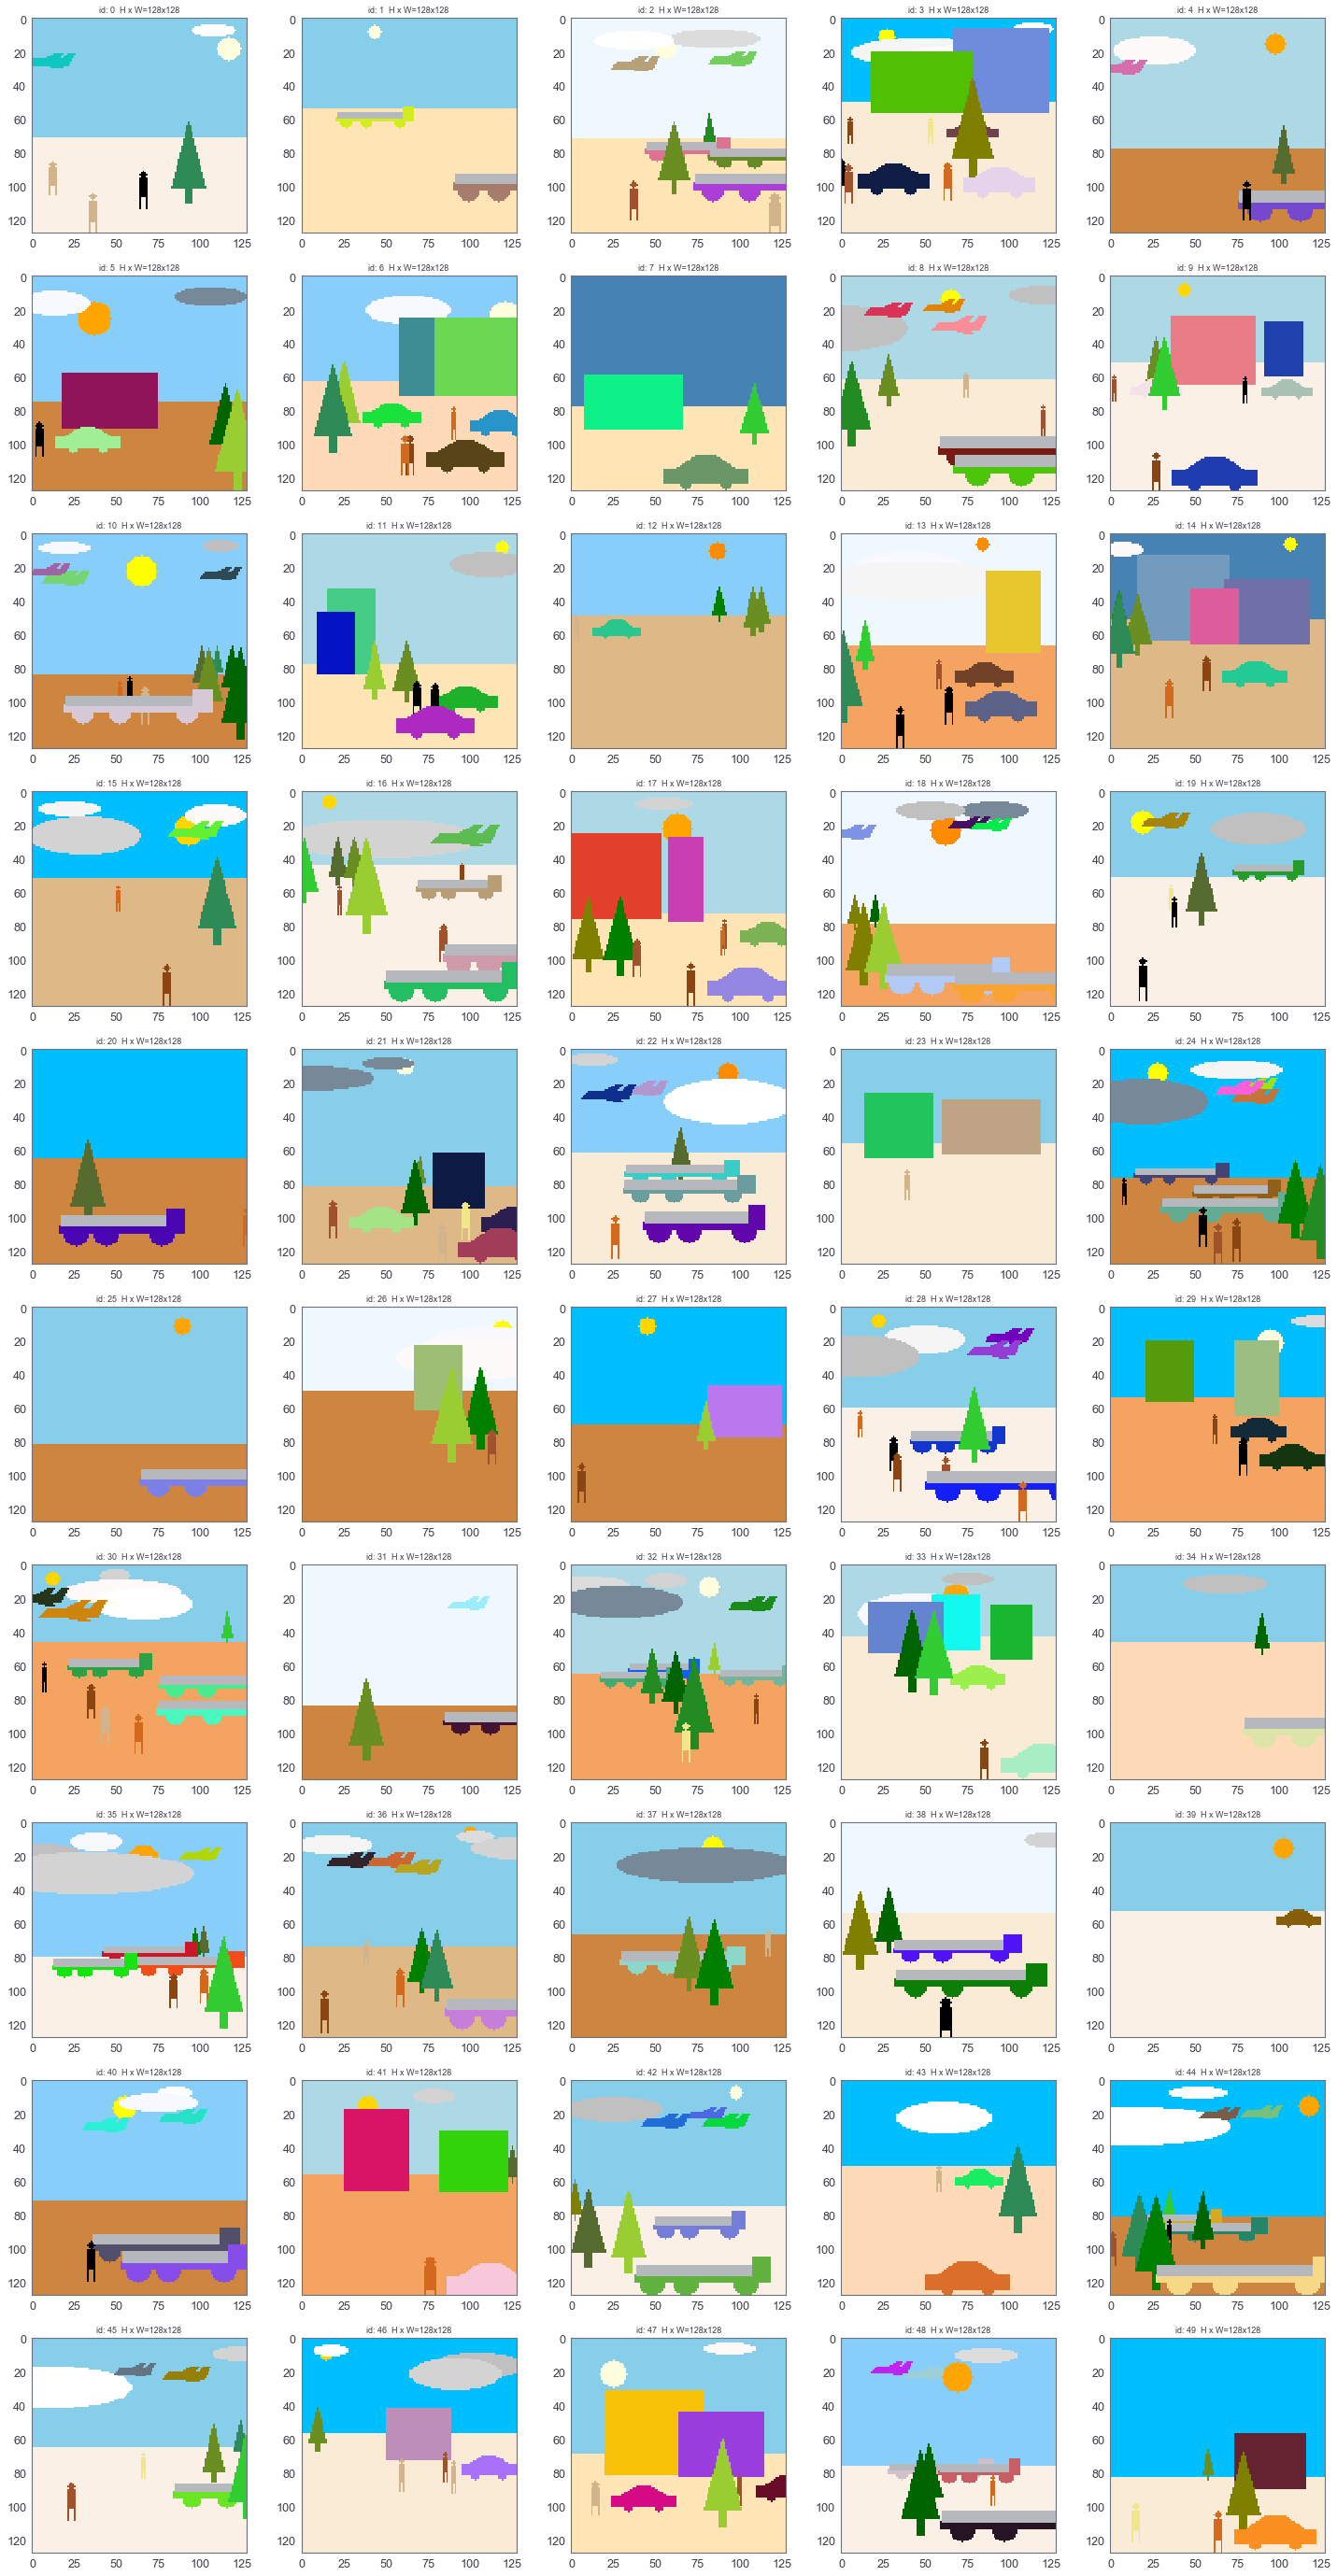

In [32]:
print(len(dataset_test.image_ids))
# print(dataset_test.image_ids[-20:])
image_list = dataset_test.image_ids.tolist()[:50] ## [-4:]
dataset_test.display_image(image_list, grid = False)

### `debug_find_hidden_shapes()`

In [11]:
IMAGE_ID = 498
from mrcnn.Image import find_hidden_shapes_2
pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
ix = find_hidden_shapes_2(dataset_test.image_info[IMAGE_ID]['shapes'], verbose = True)

[ ('sun', (255.0, 215.0, 0.0), (29, 9, 4, 4)),
  ('cloud', (255.0, 250.0, 250.0), (91, 12, 27, 5)),
  ('cloud', (220.0, 220.0, 220.0), (20, 13, 23, 5)),
  ('cloud', (119.0, 136.0, 153.0), (74, 21, 27, 9)),
  ('airplane', (68.0, 8.0, 165.0), (27, 25, 16, 6)),
  ('airplane', (122.0, 223.0, 32.0), (26, 32, 18, 7)),
  ('airplane', (38.0, 105.0, 181.0), (95, 32, 18, 7)),
  ('tree', (0.0, 128.0, 0.0), (53, 72, 4, 10)),
  ('tree', (154.0, 205.0, 50.0), (86, 81, 6, 17)),
  ('truck', (228.0, 15.0, 176.0), (103, 90, 27, 9)),
  ('person', (139.0, 69.0, 19.0), (73, 95, 2, 11)),
  ('truck', (190.0, 230.0, 166.0), (115, 96, 30, 10)),
  ('tree', (107.0, 142.0, 35.0), (65, 88, 9, 22)),
  ('person', (210.0, 105.0, 30.0), (114, 104, 3, 13)),
  ('truck', (75.0, 234.0, 193.0), (70, 111, 37, 12))]
     Shape: sun             occluded_object (= Mask[i] * Occlusion)  Orig area:49  
     Shape: cloud           occluded_object (= Mask[i] * Occlusion)  Orig area:484  
     Shape: cloud           occluded_object

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

[[11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111111011111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111100000111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111]
 [11111111111111111111111111000000011111111111111111111111111111111111111111

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

[[00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000]
 [00000000000000000000000000000000000000000000000000000000000000000000000000

### Display selected images

In [ ]:
from mrcnn.Image import display_shapes
# image_list = dataset_test.image_ids.tolist()
# image_list = [170, 222, 258, 411, 413, 514, 595, 718, 884, 792, 760]
# image_list = [812, 859, 890, 901]
IMAGE_ID = 8
image_list = [IMAGE_ID]
display_shapes(dataset_test.image_info[IMAGE_ID]['shapes'])
dataset_test.display_image(image_list)

### Display ground truth for one image


GT_BOXES for image  498
--------------------------------------------------------------------------------
        class             |                              
seq  id name              |  Y1  X1  Y2  X2     CX     CY    AREA
--------------------------------------------------------------------------------
  0  3 sun                |   5  26   9  33    29.5    7.0    28.00
  1  6 cloud              |   7  64  18 119    91.5   12.5   605.00
  2  6 cloud              |   8   0  19  44    22.0   13.5   484.00
  3  6 cloud              |  12  47  31 102    74.5   21.5  1045.00
  4  7 airplane           |  19  11  27  36    23.5   23.0   200.00
  5  7 airplane           |  25   8  34  37    22.5   29.5   261.00
  6  7 airplane           |  25  77  34 106    91.5   29.5   261.00
  7  5 tree               |  62  49  83  58    53.5   72.5   189.00
  8  5 tree               |  64  82  84  91    86.5   74.0   180.00
  9  8 truck              |  81  76  98 128   102.0   89.5   884.00
 10  1 pe

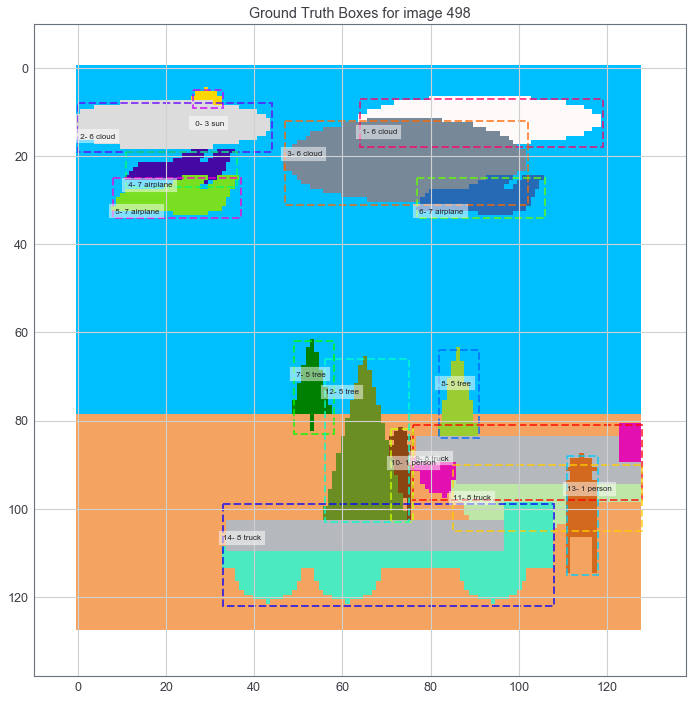

In [12]:
IMAGE_ID = 498
# config.display()
# pp.pprint(dataset_test.source_class_ids)
# pp.pprint(dataset_test.image_info[IMAGE_ID])
vis2.display_gt_bboxes(dataset_test, config, image_id = IMAGE_ID)

## Dev Code

### experiment `get_pairwise_occlusion_ratio()`

In [ ]:
IMAGE_ID = 9
from mrcnn.Image import display_shapes
display_shapes(dataset_test.image_info[IMAGE_ID]['shapes'])


In [ ]:
from mrcnn.Image import order_shapes_by_bottom_edge
import copy

draw_priority_list = ['sun', 'cloud', 'airplane', 'person']
start = copy.copy(dataset_test.image_info[IMAGE_ID]['shapes'])
display_shapes(start)
mini = [start.index(i) for i in start if i[0] in draw_priority_list]
display_shapes(start)
print(mini)
# display_shapes(mini)

# srt = order_shapes_by_bottom_edge(mini)
# display_shapes(srt)

In [ ]:
import copy
OBJECT_TO_TEST = 0
other_shapes  = copy.copy(dataset_test.image_info[IMAGE_ID]['shapes'])

print('Image shapes: \n')
display_shapes(other_shapes)

new_shape = other_shapes.pop(OBJECT_TO_TEST)
print('new_shape: \n')
display_shapes([new_shape])

print('other_shapes: \n')
display_shapes(other_shapes)

# tst_arr = np.array([shp[2] for shp in other_shapes])
# print('tst_arr: ', tst_arr.shape)
# print(tst_arr)
# tst_arr2 = np.array([tst_arr[:,1]-tst_arr[:,3], tst_arr[:,0]-tst_arr[:,2], tst_arr[:,1]+tst_arr[:,3], tst_arr[:,0]+tst_arr[:,2]]).T
# print('tst_arr2: ', tst_arr2.shape)
# print(tst_arr2)
# print(np.array(tst_arr[:,1]-tst_arr[:,3],tst_arr[:,1]+tst_arr[:,3]).shape)

get_pairwise_occlusion_ratio(new_shape, other_shapes, True)


In [ ]:
from mrcnn.Image import draw_object
##---------------------------------------------------------------------------------------------
## get_occlusion_ratio
##---------------------------------------------------------------------------------------------
def get_pairwise_occlusion_ratio( new_object, other_objects, verbose = False):
    '''
    a variation of load_masks customized to find objects that
    are completely hidden by other shapes
    '''
    np_format = {'int': lambda x: "%1d" % x}
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)
    
    height   = 128
    width    = 128
    new_shape, _, new_dims = new_object
    new_top  = new_dims[1] - new_dims[3]
    new_bot  = new_dims[1] + new_dims[3]
    new_left = new_dims[0] - new_dims[2]
    new_right= new_dims[0] + new_dims[2]
    
    ## get object_mask for shape
    new_object_mask   = np.zeros( [height, width], dtype=np.uint8)
    new_object_mask = np.expand_dims(draw_object(new_object_mask, new_shape, new_dims, 1), axis = -1)
    neg_new_object_mask = np.logical_not(new_object_mask)
    new_object_area = new_object_mask.sum()

    if verbose:
        print()
        print(' new_obj_mask_shape', new_object_mask.shape, ' New object area', new_object_area)
        print(' Newshape: ')
        print('        Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                    new_shape.upper(), new_dims[1], new_dims[0], new_top, new_bot, new_left, new_right, new_object_area, new_dims))
#     print(utils.mask_string(new_object_mask[:,:,0]))        
#     old_tp    = np.array([shp[2][1]-shp[2][3] for shp in other_objects])
#     old_bt    = np.array([shp[2][1]+shp[2][3] for shp in other_objects])
#     print('old_tp ', old_tp)
#     print('old_bt ', old_bt)
#     above_indexes = np.where(old_bt < new_top)
#     below_indexes = np.where(old_tp > new_bot)
#     print(' Aboves: ', above_indexes)
#     print(' Belows: ', below_indexes)
    

    old_count = len(other_objects)
    old_dims  = np.array([shp[2] for shp in other_objects] )
    old_shapes= np.array([shp[0] for shp in other_objects])
    
    old_top   = old_dims[:,1:2] - old_dims[:,3:]
    old_bot   = old_dims[:,1:2] + old_dims[:,3:]
    old_left  = old_dims[:,0:1] - old_dims[:,2:3]
    old_right = old_dims[:,0:1] + old_dims[:,2:3]
    old_boxes = np.hstack([old_top,old_left,old_bot,old_right])
    old_count = old_shapes.shape[0]
    
    
    ## get masks for existing shapes
    
    mask      = np.zeros( [height, width, old_count], dtype=np.uint8)
    for i, (shp, dim) in enumerate(zip(old_shapes, old_dims)):
        mask[:, :, i:i + 1] = draw_object(mask[:, :, i:i + 1].copy(), shp, dim, 1)
    neg_mask =np.logical_not(mask)
    old_object_area = mask.sum(axis = (0,1))    
    
    if verbose:
        print(' Number of previous objects :', old_count)
        for i in range(old_count):
            print('    {:2d}  Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                  i, old_shapes[i].upper(), old_dims[i,1],old_dims[i,0], 
                     old_boxes[i,0], old_boxes[i,2], old_boxes[i,1], old_boxes[i,3], old_object_area[i], old_dims[i]))
    
    # identify objects not affected by new object and drop them from occlusion calculations
    
    above_indexes = np.where(old_bot  < new_top)
    below_indexes = np.where(old_top  > new_bot)
    drop_indexes  = np.union1d(above_indexes[0], below_indexes[0]).astype(np.int)

    
    old_shapes = np.delete(old_shapes, drop_indexes, axis =0)
    old_boxes  = np.delete(old_boxes, drop_indexes, axis =0)
    old_dims   = np.delete(old_dims, drop_indexes, axis =0)
    mask       = np.delete(mask, drop_indexes, axis = -1)
    neg_mask   = np.logical_not(mask)
    old_object_area = mask.sum(axis = (0,1))    
    old_count  = old_shapes.shape[0]
    if verbose:
        print(' Aboves: ', above_indexes[0])
        print(' Belows: ', below_indexes[0])
        print(' drop_indexes: ', drop_indexes)
        print(' Trimmed old shaps info:', old_shapes.shape)
        print(' Trimmed old dims  info:', old_dims.shape)
        print(' Trimmed old boxes info:', old_boxes.shape)    
        print(' Trimmed old masks info:', mask.shape)    
        
    if verbose:
        print(' Number of other objects After removing irrelevant boxes :', old_count, ' Mask shape', mask.shape)
        for i in range(old_count):
            print('    {:2d}  Shape: {:15s}   CY: {:3d}   CX: {:3d}  Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  area: {:8.2f}    dims:{}'.format(
                  i, old_shapes[i].upper(), old_dims[i,1], old_dims[i,0],
                  old_boxes[i,0], old_boxes[i,2], old_boxes[i,1], old_boxes[i,3], old_object_area[i], old_dims[i]))


    #----------------------------------------------------------------------------------
    #  apply occlusion_mask on object_mask and determine remaining area of object
    #-----------------------------------------------------------------------------------
    occluded1 = np.logical_and(neg_mask, new_object_mask)
    t_new_obj_non_occ_area = occluded1.sum(axis =(0,1))
    t_new_obj_non_occ_ratio= t_new_obj_non_occ_area / new_object_area
    t_new_obj_occ_ratio    = 1 - t_new_obj_non_occ_ratio
    
    occluded2 = np.logical_and(mask, neg_new_object_mask)
    t_old_obj_non_occ_area = occluded2.sum(axis =(0,1))
    t_old_obj_non_occ_ratio= t_old_obj_non_occ_area / old_object_area
    t_old_obj_occ_ratio    = 1 - t_old_obj_non_occ_ratio
    print()
    print(' OCCLUDED 1 SHAPE IS           : ', occluded1.shape)
    print(' NEW OBJECT- NON OCCLUDED AREAS: ', t_new_obj_non_occ_area)
    print(' NEW OBJECT- TOTAL AREA        : ', new_object_area)
    print(' NEW OBJECT- NON OCCLUDED RATIO: ', t_new_obj_non_occ_ratio)
    print(' NEW OBJECT- OCCLUDED RATIO    : ', t_new_obj_occ_ratio, type(t_new_obj_occ_ratio))
    
    print(' OCCLUDED 2 SHAPE IS           : ', occluded2.shape)
    print(' OLD OBJECT- NON OCCLUDED AREAS: ', t_old_obj_non_occ_area)
    print(' OLD OBJECT- TOTAL AREA        : ', old_object_area)
    print(' OLD OBJECT- NON OCCLUDED RATIO: ', t_old_obj_non_occ_ratio)
    print(' OLD OBJECT- OCCLUDED RATIO    : ', t_old_obj_occ_ratio, type(t_old_obj_occ_ratio))
    abv_objs = np.where(old_boxes[:,2]<=new_bot)[0]
    bel_objs = np.where(old_boxes[:,2] >new_bot)[0]
    print(' Objects above this new object: ', abv_objs )
    print(' Objects below this new object: ', bel_objs )
    
    print(' Occlusions by this object on above objs   :  ', t_old_obj_occ_ratio[abv_objs])
    print(' Occlusions by below objects on this object:  ', t_new_obj_occ_ratio[bel_objs])
    print()
    print(' Max occlusion b/w new and old objects     :  ', np.maximum(t_new_obj_occ_ratio, t_old_obj_occ_ratio))
    
#     return occ_ratio, object_mask
    return



### experiment non maximal suppression

In [ ]:
IMAGE_ID = 4
dataset_test.image_info[IMAGE_ID]
# dataset_test.source_class_ids

In [ ]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%1d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)

In [ ]:
from mrcnn.Image import debug_non_max_suppression_2
pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
# boxes = []
# for shp in dataset_test.image_info[1]['shapes']:
#     x, y, sx, sy = shp[2]
#     boxes.append([y - sy, x - sx, y + sy, x + sx])

# pp.pprint(boxes)    
# N = len(boxes)
# print(' number of boxes ',N )

In [ ]:
# keep_ixs =  debug_non_max_suppression_2(dataset_test.image_info[IMAGE_ID]['shapes'], 0.29, 1)

### experiment `find_hidden_shapes()`

In [ ]:
from mrcnn.Image import draw_object
##---------------------------------------------------------------------------------------------
## find_hidden_shapes
##---------------------------------------------------------------------------------------------
def debug_find_hidden_shapes(shapes):
    '''
    A variation of load_masks customized to find objects that
    are completely hidden by other shapes
    
    1- create a mask for each object. same size as image, '1' where the object is present, 
      '0's everywhere else
    '''

    # print('\n Load Mask information (shape, (color rgb), (x_ctr, y_ctr, size) ): ')
    # p4.pprint(info['shapes'])
    hidden_shapes = []
    count  = len(shapes)
    mask   = np.zeros( [128, 128, count], dtype=np.uint8)
    
    ## get masks for each shape
    for i, (shape, _, dims) in enumerate(shapes):
        mask[:, :, i:i + 1] = draw_object(mask[:, :, i:i + 1].copy(), shape, dims, 1)
        print(' Shape {:2d}: {:15s}   Bottom: {:5d}   MaskSum: {}    dims:{}'.format(i,shape.upper(), dims[1]+dims[3],mask[:,:,i].sum(), dims))
    shapes_area = mask.sum(axis =(0,1))
    print(shapes_area.shape, shapes_area)
#         print(utils.mask_string(mask[:,:,i]))
    #----------------------------------------------------------------------------------
    #  Start with last shape as the occlusion mask
    #   Occlusion starts with the last object an list and in each iteration of the loop
    #   adds an additional  object. Pixes assigned to objects are 0. Non assigned pixels
    #   are 1
    #-----------------------------------------------------------------------------------
    occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
    print(' Last object (Occlusion)')
    print(utils.mask_string(occlusion))
    for i in range(count - 2, -1, -1):
        print(' Shape {:2d}: {:15s}   Sum: {}  {}'.format(i,shapes[i][0].upper(), mask[:,:,i].sum(), shapes_area[i]))
        print(utils.mask_string(mask[:,:,i]))
        mask[:, :, i] = mask[:, :, i] * occlusion
        non_occ_obj_area = mask[:,:,i].sum()
        non_occ_ratio = (non_occ_obj_area / shapes_area[i])

        print()
        print(' Shape {:2d}: {:15s}  [Mask[i] * Occlusion]: Orig area:{}  Non-occluded area: {}  Non_Occluded Ratio: {} '.format(i,
                                                    shapes[i][0],shapes_area[i],mask[:,:,i].sum(), 1-non_occ_ratio))
        print(utils.mask_string(mask[:,:,i]))
        print()
        occlusion = np.logical_and(occlusion, np.logical_not(mask[:, :, i]))
        print(' New Occlusion = Occlusion && NOT(Mask[i]):   sum of occluded areas so far: ',np.logical_not(occlusion).sum())
        print(utils.mask_string(occlusion))
        print()

        ##-------------------------------------------------------------------------------------
        ## if the shape has been completely occluded by other shapes, it's mask is all zeros.
        ## in this case np.any(mask) will return FALSE.
        ## For these completely hidden objects, we record their id in hidden []
        ## and later remove them from the  list of shapes
        ##-------------------------------------------------------------------------------------
        if ( ~np.any(mask[:,:,i]) ) :
            # print(' !!!!!!  Zero Mask Found !!!!!!' )
            hidden_shapes.append(i)

    # if len(hidden_shapes) > 0 :
        # print(' ===> Find Hidden Shapes() found hidden objects ')
        # p8.pprint(shapes)
        # print(' ****** Objects completely hidden are : ', hidden_shapes)
        # for i in hidden_shapes:
            # p8.pprint(shapes[i])
    return hidden_shapes





### experiment `get_max_occlusion()`

In [ ]:
    np_format = {}
    np_format['float'] = lambda x: "%10.4f" % x
    np_format['int']   = lambda x: "%10d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)

In [ ]:
IMAGE_ID = 9
# from mrcnn.Image import debug_non_max_suppression_2
# pp.pprint(dataset_test.image_info[IMAGE_ID]['shapes'])
# boxes = []
# print(dataset_test.image_info[IMAGE_ID]['shapes'][[0,3])
for idx, shp in enumerate(dataset_test.image_info[IMAGE_ID]['shapes']):
    x, y, sx, sy = shp[2]
    print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))
#     boxes.append([y - sy, x - sx, y + sy, x + sx])

# pp.pprint(boxes)    
# N = len(boxes)
# print(' number of boxes ',N )

new_shape    = dataset_test.image_info[IMAGE_ID]['shapes'][4]
other_shapes = [dataset_test.image_info[IMAGE_ID]['shapes'][i] for i in [0,1,2,3,5,6,7]]
print()
print(' new_shape: ')
shp = new_shape
x, y, sx, sy = shp[2]
print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))
print()
print('other_shapes: ')
for idx, shp in enumerate(other_shapes):
    x, y, sx, sy = shp[2]
    print('{:2} {:15s}    {:3d}  {:3d}  {:3d}  {:3d}  {}'.format(idx, shp[0], y - sy, x - sx, y + sy, x + sx, shp[2]))


In [ ]:
occ = debug_get_max_occlusion(new_shape, other_shapes, True)

In [ ]:

def debug_compute_iou(box, boxes, box_area, boxes_area, verbose = False):
    """
    Calculates IoU of the given box with the array of the given boxes.
    box:                1D vector [y1, x1, y2, x2]
    boxes:              [boxes_count, (y1, x1, y2, x2)]
    box_area:           float. the area of 'box'
    boxes_area:         array of length boxes_count.

    Note: the areas are passed in rather than calculated here for
          efficency. Calculate once in the caller to avoid duplicate work.
    """
    # Calculate intersection areas
    y1 = np.maximum(box[0], boxes[:, 0])
    y2 = np.minimum(box[2], boxes[:, 2])
    x1 = np.maximum(box[1], boxes[:, 1])
    x2 = np.minimum(box[3], boxes[:, 3])

    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    union = box_area + boxes_area[:] - intersection[:]
    iou = intersection / union  
    occlusion = intersection / box_area
    occlusion2= intersection / boxes_area

    if verbose:
        print('    Reference box : ', box)
        print()
        # print('      box[0]      : ', box[0],'  boxes[:,0] : ', boxes[:,0], ' y1 - np.max ', y1)
        # print('      box[2]      : ', box[2],'  boxes[:,2] : ', boxes[:,2], ' y2 - np.min ', y2)
        # print('      box[1]      : ', box[1],'  boxes[:,1] : ', boxes[:,1], ' x1 - np.max ', x1)
        # print('      box[3]      : ', box[3],'  boxes[:,3] : ', boxes[:,3], ' x2 - np.min ', x2)
        print('      areas       : ', boxes_area)
        print('      ious        : ', iou)
        print('      intersection: ', intersection)
        print('      union       : ', union)
        print('      occlusion   : ', occlusion)
        print('      occlusion2  : ', occlusion2)

    return iou, intersection, union, occlusion

def debug_get_max_occlusion(new_shape, other_shapes, verbose = False ):
    
    '''
    Determined occlusion between new_shape and existing shapes  
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    '''
    if verbose:
        print('====> get_max_occlusion()  - len(other_shapes) :', len(other_shapes))
    if len(other_shapes) == 0:
        return np.array([0], dtype=np.float)

    new_cx, new_cy, new_sx, new_sy = new_shape[2]
    new_box = np.array([new_cy - new_sy, new_cx - new_sx, new_cy + new_sy, new_cx + new_sx])
    new_class = new_shape[0]
    new_area = (new_box[2] - new_box[0]) * (new_box[3] - new_box[1]) 
    
    shape_inf= [shp[2] for shp in other_shapes] 
    classes  = [shp[0] for shp in other_shapes]
    shape_inf= np.array(shape_inf)
    print('Other Shapes Info: ', shape_inf.shape)
    print(shape_inf)
    y1 = shape_inf[:,1:2] - shape_inf[:,3:]
    y2 = shape_inf[:,1:2] + shape_inf[:,3:]
    x1 = shape_inf[:,0:1] - shape_inf[:,2:3]
    x2 = shape_inf[:,0:1] + shape_inf[:,2:3]
    print('x1', x1.shape, 'y1', y1.shape)
    boxes   = np.hstack([y1,x1,y2,x2])
    print('boxes :', boxes.shape)
    print(boxes)
    classes = np.array(classes)
    scores  = np.arange(len(boxes))
    areas = (boxes[:,2] - boxes[:,0]) * (boxes[:,3] - boxes[:,1]) 
    
#     cy = boxes[:,0] + (boxes[:,2] - boxes[:,0]) //2
#     cx = boxes[:,1] + (boxes[:,3] - boxes[:,1]) //2
    cy = shape_inf[:,1]
    cx = shape_inf[:,0]
    if verbose:
        print('     Test :     {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(new_box, new_area, new_class, new_cy,new_cx, new_cy-new_sy, new_cy + new_sy))
        print('       $ against:')
        for box, cls, scr ,ar, y,x  in zip(boxes, classes, scores, areas, cy,cx): 
            print('     Shape: {:2d}  {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(scr, box, ar, cls, y , x, box[0], box[2]))

    # Compute clipped box areas
    clipped_boxes = np.zeros_like(boxes)
    clp_y1 = clipped_boxes[:,0] = np.maximum(boxes[:, 0], 0)    ## y1
    clp_x1 = clipped_boxes[:,1] = np.maximum(boxes[:, 1], 0)    ## x1
    clp_y2 = clipped_boxes[:,2] = np.minimum(boxes[:, 2], 128)  ## y2
    clp_x2 = clipped_boxes[:,3] = np.minimum(boxes[:, 3], 128)  ## x2
    clipped_areas = (clp_y2 - clp_y1) * (clp_x2 - clp_x1) 

    if verbose:
        print('====> After Clipping ')
        for box,cls,scr, ar, y, x in zip(clipped_boxes, classes, scores, clipped_areas, cy, cx):
            print('     Shape: {:2d}  {}  {:5d}      {:15s}   CY/CX:{:3d} {:3d}  Top: {:3d}   Bot: {:3d} '.format(scr, box, ar, cls, y , x, box[0], box[2]))
#             print('     scr:', scr, '  ', box, '   ', ar, '    ', cls)
    
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
             
    # Compute IoU of the picked box with the rest
    # iou, inter, union, occlusion = debug_compute_iou(new_box, boxes, new_area, areas)
    iou, inter, union, occlusion = debug_compute_iou(new_box, clipped_boxes, new_area, clipped_areas, True)
    if verbose:
        print()
        print(' **  new shape : ',new_class,'     box:', new_box, '     area: ', new_area)
        print('           clsses: ', ''.join( [i.rjust(11) for i in classes]))
        print('               CX: ', cx)
        print('               CY: ', cy)
        print('            areas: ', areas )   
        print('              iou: ', iou)
        print('     intersection: ', inter)
        print('            union: ', union)
        print('        occlusion: ', occlusion)

    return occlusion


### experiment `get_occlusion_ratio()`

In [ ]:
##---------------------------------------------------------------------------------------------
## get_occlusion_ratio
##---------------------------------------------------------------------------------------------
def get_occlusion_ratio(self, object, verbose = False):
    '''
    a variation of load_masks customized to find objects that
    are completely hidden by other shapes
    '''
    shape, _, dims = object
    object_mask   = np.zeros( [self.height, self.width], dtype=np.uint8)

    ## get object_mask for shape
    object_mask = draw_object(object_mask, shape, dims, 1)
    shape_area = object_mask.sum()

    if verbose:
        np_format = {'int': lambda x: "%1d" % x}
        np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =20000, formatter = np_format)
        top  = dims[1]-dims[3]
        bot  = dims[1]+dims[3]
        left = dims[0]-dims[2]
        right= dims[0]+dims[2]
        print('     get_occ_ratio():  Shape: {:15s}   Top:{:3d}  Bot: {:3d} Left: {:3d} Right: {:3d}  shape_area: {:8.2f}    dims:{}'.format(
                    shape.upper(), top, bot, left, right, shape_area, dims))
        # print(mask_string(object_mask))        

    #----------------------------------------------------------------------------------
    #  apply occlusion_mask on object_mask and determine remaining area of object
    #-----------------------------------------------------------------------------------

    occluded_obj = object_mask * self.occlusion_mask
    occluded_obj_area = occluded_obj.sum()
    non_occ_ratio = (occluded_obj_area / shape_area)
    occ_ratio = 1.0 - non_occ_ratio

    # if verbose:
    #     print('     Shape: {:15s} occluded_object (= Mask[i] * Occlusion)  Orig area:{}  Area considering occlusions: {}'.format(shape,shape_area, occluded_obj_area))
    #     print('     Object Occlusion Ratio is : {:8.4f}   NonOcclusion ratio: {:8.4f}'.format(occ_ratio, non_occ_ratio))
    #     # print(mask_string(occluded_obj))
    #     print()

    return occ_ratio, object_mask




###  experiment with pop() and remove()

In [ ]:
from matplotlib      import colors
a = colors.to_rgba_array(colors.CSS4_COLORS['forestgreen'])[0,:3]
print(a, a.shape, type(a), a.dtype)
color = np.random.randint(0, 255, (3,), dtype = np.int32).astype(np.float32)
print(color, color.dtype)
a2 = (color[0], color[1], color[2])
print(a2, type(a2), type(a2[0]))
a3 = np.asscalar(color[0])
print(a3, type(a3), type(a3))

In [ ]:
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
x  = 73 
y  = 67 
sx = 11 
sy = 33
print(' Draw Tree')
print('    CX :', x, 'CY:', y , 'sx: ',sx , 'sy: ', sy)

for theta in [30, 45, 60,75, 80, 85, 87.5, 90]:
    sin_t = math.sin(math.radians(theta))

    ty = sy //3                # trunk length
    by = sy - ty               # body length
    tx = int((by/ sin_t)//5)   # trunk width
    bx = by / sin_t            # body width 
    points = np.array([[(x, y - by),                    ## top 
                        (x - bx, y + by),     ## left
                        (x + bx, y + by),     ## right 
                        ]], dtype=np.int32)
    print('   sin_t:', round(sin_t,4),'    Trunk Length : ', ty , 'Width: ', tx, ' Half Body Length :', by, '   Half Body Width: ', bx, '   points: ', points)
    print('   recatanglge :', x-tx,y+by,'   to  ', x+tx, y+by+ty)
# orde of points: top, left, right
# image = cv2.fillPoly(image, points, color)
# image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)

In [ ]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    print(i)
    print('I ',i,' before :',bb)
    bb.remove(i)
    print('I ',i,' after  :', bb)

#     print(' bb is none:',  ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)
# i = 'b'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not (bb) is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

# i = 'z'
# print('I ',i,' before :',bb)
# bb.remove(i)
# print('I ',i,' after  :', bb)
# print(' bb is none:', bb is None, ' not bb is: ', not bb, ' len(bb) == 0 ', len(bb) == 0)

In [ ]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

for i in bb:
    while i in aa:
        aa.remove(i)
        print('removed ',i,' aa list is now', aa)

In [ ]:
aa = ['a','b','c','a','a', 'b', 'z','d']
bb = ['z','b']

cc = [] 
for i in bb:
    while True:
        print('trying ',i)
        try:
            pos = aa.index(i)
        except ValueError:
            break
        else:
#             item = aa.pop(pos)
            cc.append(aa.pop(pos))
            print(' found in position ',pos,' - cc list is: ', cc, 'remaining list: ', aa)
print(sorted(cc))

print(' remaining list: ', aa)
cc = sorted(cc)
cc.extend(sorted(aa)[::-1])
print(' final cc: ', cc)

In [ ]:


a = [12, 15]
b = [0.5, 0.67, 1.25, 1.5, 1.75, 2]

random.shuffle(a)
print(a)
print(random.choice(b))

In [ ]:
max_y_dim        = 25
min_y_dim        = 15
ratio = random.choice([0.5, 0.75, 1.25, 1.5, 1.75, 2])
dim1 = np.array([random.randint(min_y_dim  , max_y_dim), min_y_dim, max_y_dim, 1], dtype = np.float)
dim2 = np.array([dim1[0] * ratio, min_y_dim * ratio, max_y_dim * ratio, ratio], dtype = np.float)
a = np.vstack([dim1, dim2])
print(ratio)
# print(dim1.shape, dim1)
# print(dim2.shape, dim2)
print(a.shape)
print(a)
np.random.shuffle(a)
print(a.shape)
print(a)
sx, min_sx, max_sx, rat_sx = a[0]
sy, min_sy, max_sy, rat_sy = a[1]
print(' SX ', sx, min_sx, max_sx, rat_sx)
print(' SY ', sy, min_sy, max_sy, rat_sy)

### experiment with meshgrid

In [ ]:
x_axis = np.arange(9)
y_axis = np.arange(5)
print(x_axis, y_axis)
# a = np.linspace(0,8,7)
xx, yy = np.meshgrid(x_axis, y_axis)
x_values = (xx -4) * 4
y_values = (yy -2) * 4
print(xx.shape)
print(xx)
print(x_values.shape)
print(x_values)
print(' y matrices')
print(yy.shape)
print(yy)
print(y_values.shape)
print(y_values)
points = [(0,2), (1,1), (3,1), (5,2), (6,0), (5,1), (6,1), (7,0), (8,0), (7,2), (5,2), (6,3), (5,3) , (0,2) ]
shape  = []
for x,y in points:
    shape.append((x_values[y,x], y_values[y,x]))
print(shape)    

### display images

In [ ]:
# image_list = dataset_test.image_ids.tolist()

# pp.pprint(dataset_test.image_info[1]['shapes'])
# image_list = [1]
image_list = [15,16,17,18,19,20,21,22,23,24]
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
# print(len(images))
# print(images[0].shape)
visualize.display_images(images, titles = image_titles, cols = 5, width = 25)

#### build, load and prepare dataset

In [ ]:
# Build shape dataset        -----------------------------------------------
# Training dataset
# generate 500 shapes 
# del dataset_train
dataset_test = newshapes.NewShapesDataset(config)
dataset_test.load_shapes(10,10)
dataset_test.prepare()

In [ ]:
print(dataset_test.active_class_ids)
print(dataset_test.active_class_info)
j = [dataset_test.active_class_info[i]['name'] for i in dataset_test.active_class_info]
print(j)

In [ ]:
# import pickle
# with open('newshapes_dataset.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
del dataset_test

with open("newshapes_dataset.pkl", 'rb') as infile:
    dataset_test = pickle.load(infile)

In [ ]:
###  Display some images from dataset

image_list = list(range(0,10))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 1, width = 24)

In [ ]:
visualize.display_image_gt(dataset_test,mrcnn_config,8)
 

###  Display Images 

In [ ]:
for image_id in range(len(test.image_ids)):
    image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                    load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False) 
    print(gt_class_ids)
#     print(test.image_info[image_id])
#     for shape, color, dims in test.image_info[image_id]['shapes']:        
#         x, y, sx, sy = dims
#         print(' Shape : {:20s}     Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d}'.format(shape,x,y,sx, sy))            
#     print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
#     print(gt_boxes)
#     visualize.display_images([image], cols = 1, width = 8)                     
    visualize.display_instances(image, gt_boxes, gt_masks, gt_class_ids, test.class_names, figsize=(8, 8))
#     visualize.display_top_masks(image, gt_masks, gt_class_ids, test.class_names)
    

##  Develop different shapes

###  Construct a semi-random image 

In [ ]:
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
color = tuple([random.randint(0, 255) for _ in range(3)])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)
for i in range(5):
    shape , color, dims = semi_random_shape(img_h, img_w )
    image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

###  Display one image

In [ ]:
image_index = 3
image_id = test.image_ids[image_index]
image, image_meta, gt_class_ids, gt_boxes, gt_masks = \
                load_image_gt(test, test_config, image_id, augment=False, use_mini_mask=False)
    
print(gt_class_ids.shape, gt_boxes.shape, gt_masks.shape)
print(gt_boxes)
print(gt_class_ids)
display_images([image], cols = 1, width = 6)
# draw_boxes(image, gt_boxes)    

### Experiemnt building shapes

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1           
    min_range_y = height //3
    max_range_y = 3 * height //4   ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)            


    min_height = 10
    max_height = 30
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
    #     sy = random.randint(min_height, max_height)
#     sx = random.randint(5,15)
    sx = sy //2 + 5

    image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)      
display_images([image], cols = 1, width = 8)

###  Automobile

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]
for i in range(1):
    cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
#     color = tuple([random.randint(0, 255) for _ in range(3)])
#     min_range_x = buffer
#     max_range_x = width - buffer - 1
#     min_range_y = height //2
#     max_range_y = height - buffer - 1
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          
#     min_width = 12
#     max_width = 26     
    ## scale width based on location on the image. Images closer to the bottom 
    ## will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
    ## old method
    ## sx = random.randint(min_width , max_width)
#     sy = sx //2

    body_y  = sy //3
    wheel_x = sx //2
    wheel_r = sx //5
#     wheel_r = 2* sy // 5
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y): ', cy - sy , '  Bottom(y) : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x     : ', wheel_x, '  wheel_r :', wheel_r)
    print('    Color:', color)
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x , cy - sy),   (cx + top_x, cy - sy),
                (cx + bot_x,  cy - body_y),(cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]



min_y_dim = 7
max_y_dim = 15

sy_list = [ 7,  8, 9, 10, 11, 12,13]
cy_list = [ 5, 20, 40, 60, 80, 100,120]
cx_list = [60 for _ in sy_list]


for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = sy * 2
#     cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
    cx = cx_list[i]
    cy = cy_list[i]
#     color = tuple([random.randint(0, 255) for _ in range(3)])
#     min_range_x = buffer
#     max_range_x = width - buffer - 1
#     min_range_y = height //2
#     max_range_y = height - buffer - 1
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          
#     sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim   , max_y_dim]  ))
#     sx = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim*2 , max_y_dim*2] ))
#     min_width = 12
#     max_width = 26     
    ## scale width based on location on the image. Images closer to the bottom 
    ## will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
    ## old method
    ## sx = random.randint(min_width , max_width)
#     sy = sx //2
#     wheel_r = sx //5
#     body_y  = 3* sy // 5
    car_height = sy * 2
    body_y  = sy //3
    wheel_r = 2* sy // 5
    
    
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y) : ', cy - sy   , '  Bottom(y)   : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Cab top    : ', cy - sy   , '  Cab bottom  : ', cy - body_y , ' Cab Height: ', sy - body_y)
    print('    Car height : ', car_height, '  Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x    : ', wheel_x   , '  wheel_r     : ', wheel_r)
    print('    Color:', color)
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x,  cy - sy    ), (cx + top_x, cy - sy),
                        (cx + bot_x,  cy - body_y), (cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)]).astype(np.uint8)
bg_color = np.array([255,255,255]).astype(np.uint8)
print(bg_color)
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)
image = image * bg_color
car_shapes = [(64,114,27,13)]



min_y_dim = 7
max_y_dim = 15

# sy_list = [ 7,  8, 9, 10, 11, 12,13]
sy_list = [ 5,  6,  7 ,  8,  9, 10, 11]
cy_list = [ 5, 20, 40, 60, 80, 100,120]
cx_list = [60 for _ in sy_list]


for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = int(sy * 2.4)
#     cx, cy,sx,sy = car_shapes[i]
    color = (24, 101, 173)
    cx = cx_list[i]
    cy = cy_list[i]

#     sy = sx //2
#     wheel_r = sx //5
#     body_y  = 3* sy // 5
    ttl_height = sy * 2
    body_y  = sy //3
    wheel_r = 2* sy // 5

    body_y  = int(2 * sy /5)
    wheel_r = int(2 * sy /5)
    
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4

    print('    CX :', cx, ' CY:', cy , '     SX: ',sx , 'sy: ', sy)
    print('    Car Top(y) : ', cy - sy   , '  Bottom(y)   : ', cy + body_y + wheel_r, ' Left(x):', cx - sx, ' Right(x) : ', cx+sx) 
    print('    Cab top    : ', cy - sy   , '  Cab bottom  : ', cy - body_y , ' Cab Height: ', sy - body_y)
    print('    Car height : ', car_height, '  Half Car hgt: ', sy,  ' Half Body height (body_y): ', body_y , ' Half body width : ', sx)
    print('    wheel_x    : ', wheel_x   , '  wheel_r     : ', wheel_r)
    print('    Color:', color)
    
    
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)
    image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)
    image = cv2.circle(image, (cx + wheel_x , cy + body_y), wheel_r, color, -1)
    # Top cab    
    points = np.array([[(cx - top_x,  cy - sy    ), (cx + top_x, cy - sy),
                        (cx + bot_x,  cy - body_y), (cx - bot_x, cy - body_y), ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    
display_images([image], cols = 1, width = 8)

###  Truck

In [ ]:
height , width = 128, 128
img_h, img_w = 128,128
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# image = image * bg_color.astype(np.uint8)

cab_color = tuple([random.randint(0, 255) for _ in range(3)])
horizon_line = 64
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

buffer    = 10
min_x_dim = 12
max_x_dim = 26     
min_y_dim = 6
max_y_dim = 13     
dflt_min_range_y = min_y_dim +1
# dflt_min_range_y = horizon_line  ## min_y_dim +1
dflt_max_range_y = height - 10 
min_range_x = buffer
max_range_x = width - buffer - 1
# min_range_y = buffer
# max_range_y = height - buffer - 1
min_range_y = dflt_min_range_y
max_range_y = dflt_max_range_y


sy_list = np.arange(min_y_dim, max_y_dim+1)
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list)).astype(np.int)
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)

for i in range(len(cy_list)):
# for i in range(4):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    cy = cy_list[i]
    cx = 64
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)          

    ## scale width based on location on the image. Images closer to the bottom  will be larger
#     sx = np.interp([cy],[min_range_y, max_range_y], [min_width, max_width])
#     sy = sx //2
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    xy_ratio = random.randint(2,4)
    sx = sy * xy_ratio
#     sx = sy * 4
    
    body_y  = sy //5
    wheel_x = sx //2
    top_x   = sx //4
    bot_x   = 3*sx //4
    wheel_r = 2 * sy //3
    cab_top_x = (3 * sx)//4

    print('CX :', cx, 'CY:', cy , 'X to Y Ratio:', xy_ratio, '     sx: ',sx , 'sy: ', sy, 'body_y ', body_y,' wheel_r :', wheel_r)

    ## cab
    image = cv2.rectangle(image, (cx + cab_top_x, cy -sy), (cx + sx, cy ), color, -1)  


    ## Rear Wheel 
    image = cv2.circle(image, (cx - (3*sx//4) , cy + body_y), wheel_r, color, -1)     
    image = cv2.circle(image, (cx - (  sx//4) , cy + body_y), wheel_r, color, -1)     
    ## Front Wheel
    image = cv2.circle(image, (cx + (2*sx//3) , cy + body_y ), wheel_r, color, -1)     
    ## Wheels - Older method
    #     image = cv2.circle(image, (cx - wheel_x , cy ), wheel_r, color, -1)     
    #     image = cv2.circle(image, (cx - wheel_x , cy + body_y), wheel_r, color, -1)     
    ## Front Wheel
    #     image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     

    ## lower bed
    image = cv2.rectangle(image, (cx - sx, cy - body_y), (cx + sx, cy + body_y), color, -1)    
    ## Upper bed
    image = cv2.rectangle(image, (cx - sx+1, cy - (2*sy//3))  , (cx + cab_top_x -1, cy -body_y), (181,185,189), -1)

    
display_images([image], cols = 1, width = 8)

### Modern Airplane with interpolation of sy/sx based on cy/cx

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
horizon_line = 90
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

min_height  = 16
max_height  = 16
# sy = random.randint(min_height, max_height)            
# sx = sy
min_y_dim = 4
max_y_dim = 10
sy = 4
sx = 8   ## Half of height and width
step_sz = 2

## height  = sy * step_sz
## width   = sx * step_sz
## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
## sy, sx = 16, 32   ## Half of height and width
# x_rng = np.arange( -sx , (sx + 1)) * step_sz
# y_rng = np.arange( -sy , (sy + 1)) * step_sz
# x_values, y_values = np.meshgrid(x_rng, y_rng)
# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

# point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,5), (3,6), (3,5), (2,3) ]
# , (2,5), (3,6), (3,5)
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]
# (4,10), (6,12), (6,10)
# point_list_16_by_8 = [(4,-8), (2,-6), (2,-2), (0,2), (0,4), (2,2), (2,4), (0,6), (0,8), (4,6),  (4,8) ]


min_y_dim = 3
max_y_dim = 10
dflt_min_range_y = min_y_dim +1
dflt_max_range_y = horizon_line - 10 
dflt_min_range_x = 0   # self.config.Min_X[shape]
dflt_max_range_x = width  #    self.config.Max_X[shape]
min_range_x      = dflt_min_range_x
max_range_x      = dflt_max_range_x



sy_list = np.arange(min_y_dim, max_y_dim+1)
# cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list))
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)
for i in range(len(cy_list)):


# for i in range(6):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    ## interpolation of sy/sx based on cy/cx
    #     min_range_x = sx
    #     max_range_x = width - sx           
    #     min_range_y = sy
    #     max_range_y = height - sy
    
    min_range_y = dflt_min_range_y
    max_range_y = dflt_max_range_y #
    cy = cy_list[i]
#     cy = random.randint(min_range_y, max_range_y)
#     cx = 64
    cx = random.randint(min_range_x, max_range_x)
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    sx = sy * 8//3
    step_sz = sy / 4
    
    print('   Build between Y      : [',      min_range_y,     max_range_y, ']               X: [', min_range_x, max_range_x, ']' )
    print('   interpolation range Y: [', dflt_min_range_y, dflt_max_range_y,']   Min / Max Dim: [', min_y_dim, max_y_dim, ']  CY:', cy, 'SY: ', sy)
    print('   Step Size            : ', step_sz, '    sy: ', sy , '  sx:', sx)
    print('   Final (cx,cy,sx,sy)  : ', cx,cy,sx,sy)
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('      x_rng:  ', x_rng)
    print('              ', x_rng+cx)
    print('      y_rng:  ', y_rng)
    print('              ', y_rng+cy)
    x_values += cx
    y_values += cy
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
#     print('x_values adjusted for CX: ', cx)
#     print(x_values.shape)
#     print(x_values)
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points = [(x_values[i,j], y_values[i,j]) for (i,j) in point_list_16_by_8]
    points = np.array([points], dtype=np.int32)
#     print(' points list ')
#     print(points)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

### Old Trees

In [ ]:
import cv2
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
sin60 = math.sin(math.radians(60))

image = np.ones([height, width, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer  
    max_range_x = width - (buffer) - 1           
    min_range_y = height // 3
    max_range_y = width - (buffer) - 1    ##* min_range_y
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_height = 8
    max_height = 24
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height])    
#     sy = random.randint(min_height, max_height)            
    sx = sy
    
    ty = sy //3            # trunk length - 1/3 total length 
    by = sy - ty           # body length  ~ 2/3 total length
    tx = int((by /sin60)//5)   # trunk width
#    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
    # orde of points: top, left, right
    points = np.array([[(x, y - by),
                        (x - (by / sin60), y + by),
                        (x + (by / sin60), y + by),
                        ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
    image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width = 6)

### Trees

In [ ]:
import cv2
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
sin60 = math.sin(math.radians(60))

image = np.ones([height, width, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

min_range_x = buffer  
max_range_x = width - (buffer) - 1           
min_range_y = height // 3
max_range_y = width - (buffer) - 1    ##* min_range_y

min_y_dim = 9
max_y_dim = 30

for i in range(1):
    color = tuple([random.randint(0, 255) for _ in range(3)])
#     x = random.randint(min_range_x, max_range_x)
#     y = random.randint(min_range_y, max_range_y)                      
#     sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim   , max_y_dim]   ))
#     sx = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim//4, max_y_dim//4])) 
    cx = 35
    cy = 85
    sx = 7
    sy = 30 
## old
#     sy = random.randint(min_height, max_height)            
#     sx = sy
#     ty = sy //3            # trunk length - 1/3 total length 
#     by = sy - ty           # body length  ~ 2/3 total length
#     tx = int((by /sin60)//5)   # trunk width
# #    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
#     # orde of points: top, left, right
#     points = np.array([[(x, y - by),
#                         (x - (by / sin60), y + by),
#                         (x + (by / sin60), y + by),
#                         ]], dtype=np.int32)
#     image = cv2.fillPoly(image, points, color)             
#     image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)


    sin_t = math.sin(math.radians(60))

    full_height = 2 * sy
    ty = full_height //5                # trunk length
    by = (full_height - ty) // 2        # half body length
    
    bx = int(by / sin_t) // 2  # half body width 
    tx = bx//5                 # trunk width
    # orde of points: top, left, right
    points = np.array([[(cx, cy - by),                    ## top 
                        (cx - bx, cy + by),     ## left
                        (cx + bx, cy + by),     ## right 
                        ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    image = cv2.rectangle(image,(cx-tx,cy+by), (cx+tx, cy+by+ty),color, -1)

    print('    Tree  Top(y) : ',cy - by , '  Bottom(y)   : ', cy+by+ty, '    Left(x)       : ', cx - bx, ' Right(x) : ', cx+bx)
    print('    Trunk Length : ',ty      , '  Body Length : ', by       , '    0.5 Body Width: ', bx     , ' 0.5 Trunk Width: ', tx)
    image[cy,cx] = [0,0,255]
display_images([image], cols = 1, width = 6)

In [ ]:
import cv2
# del by
height , width = 128, 128
sin_60 = math.sin(math.radians(60))

bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20
sin60 = math.sin(math.radians(60))

image = np.ones([height, width, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

min_range_x = buffer  
max_range_x = width - (buffer) - 1           
min_range_y = height // 3
max_range_y = width - (buffer) - 1    ##* min_range_y

min_y_dim = 9
max_y_dim = 30

for i in range(1):
    color = tuple([random.randint(0, 255) for _ in range(3)])
#     x = random.randint(min_range_x, max_range_x)
#     y = random.randint(min_range_y, max_range_y)                      
#     sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim   , max_y_dim]   ))
#     sx = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim//4, max_y_dim//4])) 
    cx = 35
    cy = 85
    sx = 7
    sy = 30 
## old
#     sy = random.randint(min_height, max_height)            
#     sx = sy
#     ty = sy //3            # trunk length - 1/3 total length 
#     by = sy - ty           # body length  ~ 2/3 total length
#     tx = int((by /sin60)//5)   # trunk width
# #    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
#     # orde of points: top, left, right
#     points = np.array([[(x, y - by),
#                         (x - (by / sin60), y + by),
#                         (x + (by / sin60), y + by),
#                         ]], dtype=np.int32)
#     image = cv2.fillPoly(image, points, color)             
#     image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)


    ty = (2 * sy) //5                # trunk length
    lby = sy - ty
    
#   old method:  bx = int(by /sin_t) // 2  # half body width 
    bx = int( ((2 * sy)//5)  /sin_t)  ##  // 2  # half body width 
    tx = bx//5                 # trunk width
    
    # order of points: top, left, right
    points = np.array([[(cx, cy - sy),           ## top 
                        (cx - bx, cy + lby),     ## left
                        (cx + bx, cy + lby),     ## right 
                        ]], dtype=np.int32)
    image = cv2.fillPoly(image, points, color)
    image = cv2.rectangle(image,(cx-tx,cy+lby), (cx+tx, cy+sy),color, -1)
 
    print('    sy: ' ,sy, ' ty: ', ty)
    print('    Tree  Top(y) : ',cy - sy , ' Bottom(y)   : ', cy + sy, '  Left(x)       : ', cx - bx, ' Right(x) : ', cx+bx)
    print('    Trunk Length : ',ty      , ' 0.5 Trunk Wi: ', tx)
    print('    Body Length  : ',sy+lby , ' Top  Body   : ', cy - sy, '  Bottom of body: ', cy+lby,'  0.5 Max Body Width: ', bx)
    image[cy,cx] = [0,0,255]
display_images([image], cols = 1, width = 6)

### Modern Airplane

In [ ]:
    np_format = {}
    np_format['float'] = lambda x: "%6.2f" % x
    np_format['int']   = lambda x: "%4d" % x
    np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
bg_color = np.array([  64,  120,  222])
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)


buffer = 20
min_height  = 16
max_height  = 16

cx = 40
cy = 40
## sy/sx : Half of height and width
step_sz = 2
sy = 14   ## height  = sy * step_sz
sx = 28   ## width   = sx * step_sz 
# sy = 15
# sx = 30
# sy =  13
# sx =  26
# sy = 3
# sx = 6
# sy = 4
# sx = 8


## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
x_rng = np.arange( -sx , (sx + 1)) * step_sz
y_rng = np.arange( -sy , (sy + 1)) * step_sz
x_values, y_values = np.meshgrid(x_rng, y_rng)

# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,3) ]
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]


sy_list = [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cx_list = [64 for _ in sy_list]


# for i in range(0.5,3 0.5):
# for i in np.linspace(3,3.5,2): #int(3.5//0.5)):
for i in range(len(sy_list)):
    sy = sy_list[i]
    sx = sy * 2
    color = tuple([random.randint(0, 255) for _ in range(3)])
    step_sz = sy / 4
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('Step Size ', step_sz, 'sy:', sy,  'sx:', sx, ' sy*step_sz:', sy*step_sz,' sx*step_sz:',sx*step_sz)
    print('      x_rng:  ', x_rng)
    print('      y_rng:  ', y_rng)
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
    min_range_x = sx
    max_range_x = width - sx           
    min_range_y = sy
    max_range_y = height - sy
    cx = random.randint(min_range_x, max_range_x)
    cy = random.randint(min_range_y, max_range_y)  
    cx = cx_list[i]
    cy = cy_list[i]
    x_values += cx
    y_values += cy
    print('x_values adjusted for CX: ', cx)
    print(x_values.shape)
    print(x_values[0])
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points  = []
    for i,j in point_list_16_by_8:
#     for i,j in point_list_8_by_4:        
        points.append((x_values[i,j], y_values[i,j]))
#     print(' points list ')
#     print(points)
    points = np.array([points], dtype=np.int32)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

### Modern Airplane with interpolation of sy/sx based on cy/cx

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
horizon_line = 90
buffer = 20

horizon_color = np.array([  64, 120, 222])
ground_color  = np.array([ 167, 114,  65])

image = np.ones([img_h, img_w, 3], dtype=np.uint8)
# bg_color = np.array([random.randint(0, 255) for _ in range(3)])
# image = image * bg_color.astype(np.uint8)

image[:horizon_line,:,:] =  horizon_color
image[horizon_line:,:,:] =  ground_color

min_height  = 16
max_height  = 16
# sy = random.randint(min_height, max_height)            
# sx = sy
min_y_dim = 4
max_y_dim = 10
sy = 4
sx = 8   ## Half of height and width
step_sz = 2

## height  = sy * step_sz
## width   = sx * step_sz
## x_rng = np.arange( -width//2 ,  width//2 + 1, step)
## y_rng = np.arange(-height//2 , height//2 + 1, step)
## sy, sx = 16, 32   ## Half of height and width
# x_rng = np.arange( -sx , (sx + 1)) * step_sz
# y_rng = np.arange( -sy , (sy + 1)) * step_sz
# x_values, y_values = np.meshgrid(x_rng, y_rng)
# print(x_rng, y_rng)
# print('x_values: ',x_values.shape)
# print(x_values)
# print('y_values: ',y_values.shape)
# print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3),  (0,5),  (0,6),  (1,5),  (1,6),  (0,7),  (0,8),  (2,7), (2,5), (3,6), (3,5), (2,3) ]
# , (2,5), (3,6), (3,5)
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14), (4,10), (5,12), (5,10), (4,6) ]
# (4,10), (6,12), (6,10)
# point_list_16_by_8 = [(4,-8), (2,-6), (2,-2), (0,2), (0,4), (2,2), (2,4), (0,6), (0,8), (4,6),  (4,8) ]


min_y_dim = 3
max_y_dim = 10
dflt_min_range_y = min_y_dim +1
dflt_max_range_y = horizon_line - 10 
dflt_min_range_x = 0   # self.config.Min_X[shape]
dflt_max_range_x = width  #    self.config.Max_X[shape]
min_range_x      = dflt_min_range_x
max_range_x      = dflt_max_range_x



sy_list = np.arange(min_y_dim, max_y_dim+1)
# cy_list = [ 5, 12, 20, 30, 40, 50, 65, 80, 95, 110]
cy_list =np.linspace(dflt_min_range_y, dflt_max_range_y, len(sy_list))
print(' sy_list:', sy_list)
print(' cy_list:', cy_list)
for i in range(len(cy_list)):


# for i in range(6):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    ## interpolation of sy/sx based on cy/cx
    #     min_range_x = sx
    #     max_range_x = width - sx           
    #     min_range_y = sy
    #     max_range_y = height - sy
    
    min_range_y = dflt_min_range_y
    max_range_y = dflt_max_range_y #
    cy = cy_list[i]
#     cy = random.randint(min_range_y, max_range_y)
#     cx = 64
    cx = random.randint(min_range_x, max_range_x)
    sy = int(np.interp([cy],[dflt_min_range_y, dflt_max_range_y], [min_y_dim, max_y_dim]))
    sx = sy * 8//3
    step_sz = sy / 4
    
    print('   Build between Y      : [',      min_range_y,     max_range_y, ']               X: [', min_range_x, max_range_x, ']' )
    print('   interpolation range Y: [', dflt_min_range_y, dflt_max_range_y,']   Min / Max Dim: [', min_y_dim, max_y_dim, ']  CY:', cy, 'SY: ', sy)
    print('   Step Size            : ', step_sz, '    sy: ', sy , '  sx:', sx)
    print('   Final (cx,cy,sx,sy)  : ', cx,cy,sx,sy)
    x_rng = np.arange( -sx , (sx + 1), step_sz)
    y_rng = np.arange( -sy , (sy + 1), step_sz)
    x_values, y_values = np.meshgrid(x_rng, y_rng)
    print('      x_rng:  ', x_rng)
    print('              ', x_rng+cx)
    print('      y_rng:  ', y_rng)
    print('              ', y_rng+cy)
    x_values += cx
    y_values += cy
#     print('   x_values:  ',x_values.shape)
#     print('              ',x_values[0])
#     print('   y_values:  ',y_values.shape)
#     print('              ',y_values[:,0])
#     print('x_values adjusted for CX: ', cx)
#     print(x_values.shape)
#     print(x_values)
#     print('y_vaues adjusted for CY: ', cy)
#     print(y_values.shape)
#     print(y_values)
                  
    points = [(x_values[i,j], y_values[i,j]) for (i,j) in point_list_16_by_8]
    points = np.array([points], dtype=np.int32)
#     print(' points list ')
#     print(points)
#     print(' points np.array ', points.shape)
#     print(points)
    image = cv2.fillPoly(image, points, color)             

    
display_images([image], cols = 1, width =10)

In [ ]:
print(bg_color)
print(np.linspace(0.5,3, int(3//0.5)))

###  Old Airplane

In [ ]:
# del xx, yy, x_axis, y_axis, x
height , width, img_w, img_h = 128, 128, 128,128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 20

min_range_x = buffer //3
max_range_x = width - (buffer//3) - 1           
min_range_y = height //3
max_range_y = 2* height // 3    ##* min_range_y
height   = 32
width    = 64
# height   = 16
# width    = 32
step     = 4
x_rng = np.arange( -width//2 ,  width//2 + 1, step)
y_rng = np.arange(-height//2 , height//2 + 1, step)
x_values, y_values = np.meshgrid(x_rng, y_rng)

print(x_rng, y_rng)
print('x_values: ',x_values.shape)
print(x_values)
print('y_values: ', y_values.shape)
print(y_values)

point_list_8_by_4  = [(2,0), (1,1), (1,3), (0,5), (0,6), (1,5), (1,6), (0,7), (0,8), (2,7), (2,5), (3,6), (3,5), (2,3) ]
point_list_16_by_8 = [(4,0), (2,2), (2,6), (0,10), (0,12), (2,10), (2,12), (0,14), (0,16), (4,14),  (4,6) ]
# (4,10), (6,12), (6,10)
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)


for i in range(1):
    color = tuple([random.randint(0, 255) for _ in range(3)])
#     cx = random.randint(min_range_x, max_range_x)
#     cy = random.randint(min_range_y, max_range_y)  
    cx = 40
    cy = 40
    sy = random.randint(min_height, max_height)            
    sx = sy
    x_values += cx
    y_values += cy
    print('x_values adjusted for CX: ', cx)
    print(x_values.shape)
    print(x_values)
    print('y_values adjusted for CY: ', cy)
    print(y_values.shape)
    print(y_values)
                  
    points  = []
    for i,j in point_list_16_by_8:
        points.append((x_values[i,j], y_values[i,j]))
    print(' points list ')
    print(points)
    points = np.array([points], dtype=np.int32)
    print(' points np.array ', points.shape)
    print(points)

### DRAW ------------------------------------------------    
#     sin60 = math.sin(math.radians(60))    
#     step = sx //2
#     tx = sx //3            # trunk length - 1/3 of total length 
#     bx = sx - tx           # body length
#     by = (bx/sin60)        # body width
#     ty = int(by//5)        # trunk width

    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
  
#     points = np.array([[(x - sx, y ),
#                         (x + bx , y - by),
#                         (x + bx , y + by),
#                         ]], dtype=np.int32)
# 
    # orde of points: top, left, right
#     points = np.array([[(x, y - by),
#                         (x - (by / sin60), y + by),
#                         (x + (by / sin60), y + by),
#                         ]], dtype=np.int32)
#     points = np.array([[(x - bx , y),
#                         (x + bx , y - by),
#                         (x + bx , y + by),
#                         ]], dtype=np.int32)

    image = cv2.fillPoly(image, points, color)             
#     image = cv2.rectangle(image,(x+bx,y-ty), (x+bx+tx, y+ty),color, -1)

# for i in range(5):
#     shape , color, dims = semi_random_shape(img_h, img_w )
#     image = semi_draw_shape(image , shape, dims ,color)

display_images([image], cols = 1, width =10)

###  person

In [ ]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(7):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer
    max_range_x = width - buffer - 1
    min_range_y = (height //2)
    max_range_y = height - buffer - 1
    min_height = 10
    max_height = 22
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)
#     sy = random.randint(min_height, max_height)
    sy = np.interp([y],[min_range_y, max_range_y], [min_height, max_height]) 
    sx = sy // 5   # body width 
    
### DRAW ------------------------------------------------    
    
    hy = sy // 4   # head height
    by = sy - hy   # body height
    print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy)
    
    # torso
    image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
    # legs
    image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
    image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
    #head
    image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)     

display_images([image], cols = 1, width = 6)

###  Ellipse

In [ ]:
height , width = 128, 128
bg_color = np.array([random.randint(0, 255) for _ in range(3)])
buffer = 10
image = np.ones([img_h, img_w, 3], dtype=np.uint8)
image = image * bg_color.astype(np.uint8)

for i in range(3):
    color = tuple([random.randint(0, 255) for _ in range(3)])
    min_range_x = buffer//2 
    max_range_x = width - (buffer//2) - 1           
    min_range_y = buffer
    max_range_y = height //4
    x = random.randint(min_range_x, max_range_x)
    y = random.randint(min_range_y, max_range_y)                      
    min_width , max_width  = 15, 40 
#     sx = random.randint(min_width, max_width)            
    sx = np.interp([y],[min_range_y, max_range_y], [min_width, max_width]) 
#     min_height ,max_height = 10, 20
#     sy = random.randint(min_height, max_height)            
    sy = sx //  random.randint(3, 5)
    
### DRAW ------------------------------------------------      
    
    print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx)
    image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)

display_images([image], cols = 1, width = 6)

###  Routines that accept shape type and dimensions as inputs

In [ ]:
    
'''
-------------------------------------------------------------------------------
'''
def semi_random_image(self, height, width):
    '''
    Creates random specifications of an image with multiple shapes.
    Returns the background color of the image and a list of shape
    specifications that can be used to draw the image.
    '''
    # Pick random background color
    bg_color = np.array([random.randint(0, 255) for _ in range(3)])
    # Generate a few random shapes and record their
    # bounding boxes
    shapes = []
    boxes = []
    N = random.randint(1, 4)

    for _ in range(N):
        shape, color, dims = self.random_shape(height, width)
        shapes.append((shape, color, dims))
        x, y, sx, sy = dims
        boxes.append([y - sy, x - sx, y + sy, x + sx])

    # Suppress occulsions more than 0.3 IoU    
    # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
    keep_ixs = utils.non_max_suppression(np.array(boxes), np.arange(N), 0.3)

    shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]

    # print('Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
    return bg_color, shapes

def semi_random_shape(height, width, shape = None, x = 0, y = 0, sx = 0, sy = 0):
    """Generates specifications of a random shape that lies within
    the given height and width boundaries.
    Returns a tuple of three valus:
    * The shape name (square, circle, ...)
    * Shape color: a tuple of 3 values, RGB.
    * Shape dimensions: A tuple of values that define the shape size
                        and location. Differs per shape type.
    """
    # Shape
    if shape is None:
        shape = random.choice(["square", "circle", "triangle", "rectangle"])
    # Color
    color = tuple([random.randint(0, 255) for _ in range(3)])
    # Center x, y
    buffer = 20
    if y == 0:
        y = random.randint(buffer, height - buffer - 1)
    if x == 0: 
        x = random.randint(buffer, width - buffer - 1)
    # Size
    if sx == 0 :
        sx = random.randint(buffer, width // 4)
    if shape == "rectangle" and sy == 0 :
        sy = random.randint(buffer, height // 4)
    else:
        sy = sx
#     print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    return shape, color, (x, y, sx, sy)

def semi_draw_shape(image, shape, dims, color):
    """Draws a shape from the given specs."""
    # Get the center x, y and the size s
    x, y, sx, sy = dims
    print(' Shape : {}     Cntr (x,y) : ({} , {})    Size_x: {} Size_y: {}'.format(shape,x,y,sx, sy))    
    if shape == 'square':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)
    elif shape == 'rectangle':
        image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        

    elif shape == "circle":
        image = cv2.circle(image, (x, y), sx, color, -1)

    elif shape == "triangle":
        sin60 = math.sin(math.radians(60))
        points = np.array([[(x, y - sx),
                            (x - (sx / sin60), y + sx),
                            (x + (sx / sin60), y + sx),
                            ]], dtype=np.int32)
#         print(' points.shape is : ',points.shape)
#         print(points)
        image = cv2.fillPoly(image, points, color)
    return image            

###  Non Max Suppression 

In [ ]:
from mrcnn.utils import compute_iou
def non_max_suppression(boxes, scores, threshold):
    """Performs non-maximum supression and returns indicies of kept boxes.
    boxes: [N, (y1, x1, y2, x2)]. Notice that (y2, x2) lays outside the box.
    scores: 1-D array of box scores.
    threshold: Float. IoU threshold to use for filtering.
    """
    assert boxes.shape[0] > 0
    if boxes.dtype.kind != "f":
        boxes = boxes.astype(np.float32)
    # print(' non_max_suppression ')
    # Compute box areas
    y1 = boxes[:, 0]
    x1 = boxes[:, 1]
    y2 = boxes[:, 2]
    x2 = boxes[:, 3]
    area = (y2 - y1) * (x2 - x1)

    # Get indicies of boxes sorted by scores (highest first)
    ixs = scores.argsort()[::-1]

    pick = []
    print('====> Initial Ixs: ', ixs)
    while len(ixs) > 0:
        # Pick top box and add its index to the list
        i = ixs[0]
        cy = y1[i] + (y2[i]-y1[i])//2
        cx = x1[i] + (x2[i]-x1[i])//2
        print('     ix : ', ixs, 'ctr (x,y)', cx,' ',cy,' box:', boxes[i], ' compare ',i, ' with ', ixs[1:])
        pick.append(i)
        
        # Compute IoU of the picked box with the rest
        iou = compute_iou(boxes[i], boxes[ixs[1:]], area[i], area[ixs[1:]])
        print('     ious:', iou)
        # Identify boxes with IoU over the threshold. This
        # returns indicies into ixs[1:], so add 1 to get
        # indicies into ixs.
        tst =  np.where(iou>threshold)
        remove_ixs = np.where(iou > threshold)[0] + 1
        print('     np.where( iou > threshold) : ' ,tst, 'tst[0] (index into ixs[1:]: ', tst[0], 
         ' remove_ixs (index into ixs) : ',remove_ixs)
        
        # Remove indicies of the picked and overlapped boxes.
        ixs = np.delete(ixs, remove_ixs)
        ixs = np.delete(ixs, 0)
        print(' ending ixs (after deleting ixs[0]): ', ixs, ' picked so far: ',pick)
    print('====> Final Picks: ', pick)
    return np.array(pick, dtype=np.int32)



###  NewShape Class Definition

In [ ]:
class NewShapesConfig(ShapesConfig):
    '''
    Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    '''
    # Give the configuration a recognizable name
#     NAME = "shapes"

    # Number of classes (including background)
    NUM_CLASSES = 1 + 4  # background + 3 shapes


class NewShapesDataset(Dataset):
    '''
    Generates the shapes synthetic dataset. The dataset consists of simple
    shapes (triangles, squares, circles) placed randomly on a blank surface.
    The images are generated on the fly. No file access required.
    '''

    def load_shapes(self, count, height, width):
        '''
        Generate the requested number of synthetic images.
        count: number of images to generate.
        height, width: the size of the generated images.
        '''
        
        # Add classes
        self.add_class("shapes", 1, "circle")  # used to be class 2
        self.add_class("shapes", 2, "square")  # used to be class 1
        self.add_class("shapes", 3, "triangle")
        self.add_class("shapes", 4, "rectangle")
        self.add_class("shapes", 5, "person")
        self.add_class("shapes", 6, "car")
        self.add_class("shapes", 7, "sun")
        self.add_class("shapes", 8, "building")
        self.add_class("shapes", 9, "tree")
        self.add_class("shapes",10, "cloud")

        # Add images
        # Generate random specifications of images (i.e. color and
        # list of shapes sizes and locations). This is more compact than
        # actual images. Images are generated on the fly in load_image().
        for i in range(count):
            bg_color, shapes = self.random_image(height, width)
            self.add_image("shapes", image_id=i, path=None,
                           width=width, height=height,
                           bg_color=bg_color, shapes=shapes)

    def load_image(self, image_id):
        '''
        Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but in this case it
        generates the image on the fly from the specs in image_info.
        '''
        
        info = self.image_info[image_id]
        bg_color = np.array(info['bg_color']).reshape([1, 1, 3])
        
        image = np.ones([info['height'], info['width'], 3], dtype=np.uint8)
        image = image * bg_color.astype(np.uint8)
        print(" Load Image ")
        pp.pprint(info['shapes'])

        #--------------------------------------------------------------------------------
        # rearrange the shapes by ascending Y, so that items closer to bottom of 
        # image overlay items further up
        #--------------------------------------------------------------------------------
        sort_lst = [itm[2][1] for itm in info['shapes']]
        sorted_shape_ind = np.argsort(np.array(sort_lst))
        
        for shape_ind in sorted_shape_ind:
#             print(' shape ind :', shape_ind, 'shape', shape, ' color:', color,' dims ',dims)
            shape, color, dims =  info['shapes'][shape_ind]
            image = self.draw_shape(image, shape, dims, color)
        return image

    
    def image_reference(self, image_id):
        """Return the shapes data of the image."""
        info = self.image_info[image_id]
        if info["source"] == "shapes":
            return info["shapes"]
        else:
            super(self.__class__).image_reference(self, image_id)    

            
    def load_mask(self, image_id):
        '''
        Generate instance masks for shapes of the given image ID.
        '''
        # print(' Loading shapes obj mask infofor image_id : ',image_id)
        info   = self.image_info[image_id]
        shapes = info['shapes']
        # print('\n Load Mask information (shape, (color rgb), (x_ctr, y_ctr, size) ): ')
        # pp.pprint(info['shapes'])
        count  = len(shapes)
        mask   = np.zeros([info['height'], info['width'], count], dtype=np.uint8)
        
        print(' Shapes obj mask shape is :',mask.shape)
        for i, (shape, _, dims) in enumerate(info['shapes']):
            mask[:, :, i:i + 1] = self.draw_shape(mask[:, :, i:i + 1].copy(), shape, dims, 1)
        
        # Handle occlusions
        occlusion = np.logical_not(mask[:, :, -1]).astype(np.uint8)
        for i in range(count - 2, -1, -1):
            mask[:, :, i] = mask[:, :, i] * occlusion
            occlusion = np.logical_and(
                occlusion, np.logical_not(mask[:, :, i]))
        
        # Map class names to class IDs.
        class_ids = np.array([self.class_names.index(s[0]) for s in shapes])
        return mask, class_ids.astype(np.int32)
    
    def draw_shape(self, image, shape, dims, color):
        """Draws a shape from the given specs."""
        # Get the center x, y and the size s
        x, y, sx, sy = dims
        print(' Shape : {:20s}   Cntr (x,y): ({:3d} , {:3d})    Size_x: {:3d}   Size_y: {:3d} {}'.format(shape,x,y,sx, sy,color))        
        
        if shape == "square":
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)

        elif shape in ["rectangle", "building"]:
            image = cv2.rectangle(image, (x - sx, y - sy), (x + sx, y + sy), color, -1)        
#             print('X :', x, 'y:', y , '     sx: ',sx , 'sy: ', sy, 'hs:', hs)
        
        elif shape == "car":
            body_y = sy //3
            wheel_x = sx //2
            wheel_r = sx //5
            top_x   = sx //4
            bot_x   = 3*sx //4
            image = cv2.rectangle(image, (x - sx, y - body_y), (x + sx, y + body_y), color, -1)    
            image = cv2.circle(image, (x - wheel_x , y + body_y), wheel_r, color, -1)     
            image = cv2.circle(image, (x + wheel_x , y + body_y), wheel_r, color, -1)     

            points = np.array([[(x - top_x , y - sy),   (x + top_x, y - sy),
                                (x + bot_x,  y - body_y),(x - bot_x, y - body_y), ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)                     
            
        elif shape == "person":
#             hy = sy // 4   # head height
#             by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)                         
#             image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by), color, -1)    
#             image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)            

            hy = sy // 4   # head height
            by = sy - hy   # body height
#             print('X :', x, 'y:', y , 'sx: ',sx , 'sy: ', sy, 'hs:', hs)            
            # torso
            image = cv2.rectangle(image, (x - sx, y - by), (x + sx, y + by//4), color, -1)    
            # legs
            image = cv2.rectangle(image, (x - sx, y + by//4), (x - sx +sx//4, y + by), color, -1)    
            image = cv2.rectangle(image, (x + sx - sx//4, y + by//4), (x + sx, y + by), color, -1)    
            #head
            image = cv2.circle(image, (x , y -(by+hy) ), sx, color, -1)           
        elif shape in ["circle", "sun"]:
            image = cv2.circle(image, (x, y), sx, color, -1)

        elif shape in ["cloud", "ellipse"]:
            image = cv2.ellipse(image,(x,y),(sx, sy),0,0,360,color,-1)            

        elif shape == "triangle":
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - sx),
                                (x - (sx / sin60), y + sx),
                                (x + (sx / sin60), y + sx),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)
        
        elif shape == "tree":
            sin60 = math.sin(math.radians(60))
            ty = sy //3            # trunk length
            by = sy - ty           # body length
            tx = int((by /sin60)//5)   # trunk width
        #     print('sx: ',sx , 'sy: ', sy, 'tx/ty :', tx, ' bx: ',bx)
            sin60 = math.sin(math.radians(60))
            # orde of points: top, left, right
            points = np.array([[(x, y - by),
                                (x - (by / sin60), y + by),
                                (x + (by / sin60), y + by),
                                ]], dtype=np.int32)
            image = cv2.fillPoly(image, points, color)             
            image = cv2.rectangle(image,(x-tx,y+by), (x+tx, y+by+ty),color, -1)                      
            
        return image            

    def random_shape(self, shape, height, width):
        """Generates specifications of a random shape that lies within
        the given height and width boundaries.
        Returns a tuple of three valus:
        * The shape name (square, circle, ...)
        * Shape color: a tuple of 3 values, RGB.
        * Shape dimensions: A tuple of values that define the shape size
                            and location. Differs per shape type.
        """
        # Shape
#         shape = random.choice(["square", "circle", "triangle", "rectangle", "person", "car"])
        
        # Color
        color = tuple([random.randint(0, 255) for _ in range(3)])
        buffer = 20
        
        if shape == "person":
            min_range_x = buffer
            max_range_x = width - buffer - 1
#             min_range_y = (height //3) * 2
            min_range_y = (height //2)
            max_range_y = height - buffer - 1
            min_height = 10
            max_height = 22
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
#             sy = random.randint(min_height, max_height)
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            sx = sy //5    # body width 

        elif shape == "car":
#             min_range_x = buffer
#             max_range_x = width - buffer - 1
#             min_range_y = height //2
#             max_range_y = height - buffer - 1
#             min_width = 12
#             max_width = 15
#             x = random.randint(min_range_x, max_range_x)
#             y = random.randint(min_range_y, max_range_y)            
#             sx = random.randint(min_width , max_width)
#             sy = sx //3 

            min_range_x = buffer
            max_range_x = width - buffer - 1
            min_range_y = height //2
            max_range_y = height - buffer - 1

            min_width = 15
            max_width = 30 
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            ## scale width based on location on the image. Images closer to the bottom 
            ## will be larger
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
            ## old method
            ## sx = random.randint(min_width , max_width)            
            sy = sx //2            
            
        elif shape == "building":            
            min_range_x = buffer
            max_range_x = width - buffer - 1           
            min_range_y = height //3
            max_range_y = 3 * height //4   ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)            
            min_height = 10
            max_height = 30
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
            #     sy = random.randint(min_height, max_height)
            #     sx = random.randint(5,15)
            sx = sy //2 + 5            
            
        elif shape == "sun":
            min_range_x = buffer //3
            max_range_x = width - (buffer//3) - 1           
            min_range_y = buffer //3
            max_range_y = height //5    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 4
            max_height = 10
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))
#             sx = random.randint(min_height, max_height)            
            sy = sx

        elif shape == "tree":
            min_range_x = buffer  
            max_range_x = width - (buffer) - 1           
            min_range_y = height // 3
            max_range_y = width - (buffer) - 1    ##* min_range_y
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_height = 8
            max_height = 24
            sy = int(np.interp([y],[min_range_y, max_range_y], [min_height, max_height]))    
            #     sy = random.randint(min_height, max_height)            
            sx = sy
                      
        elif shape == "cloud":               
            min_range_x = buffer//2 
            max_range_x = width - (buffer//2) - 1           
            min_range_y = buffer
            max_range_y = height //4
            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)                      
            min_width , max_width  = 15, 40 
        #     sx = random.randint(min_width, max_width)            
            sx = int(np.interp([y],[min_range_y, max_range_y], [min_width, max_width]))
        #     min_height ,max_height = 10, 20
        #     sy = random.randint(min_height, max_height)            
            sy = sx //  random.randint(3, 5)
                    
        else :
            min_range_x = buffer
            min_range_y = buffer
            max_range_x = width - buffer - 1
            max_range_y = height - buffer - 1
            min_size_x  = buffer
            max_size_x  = width // 4
            min_size_y  = buffer
            max_size_y  = height //4 

            x = random.randint(min_range_x, max_range_x)
            y = random.randint(min_range_y, max_range_y)
            sx = random.randint(min_size_x, max_size_x)

            if shape == "rectangle":
                sy = random.randint(min_size_y, max_size_y)    
            else:
                ## other shapes have same sx and sy             
                sy = sx

        return  color, (x, y, sx, sy)
    
    def random_image(self, height, width):
        '''
        Creates random specifications of an image with multiple shapes.
        Returns the background color of the image and a list of shape
        specifications that can be used to draw the image.
        '''
        # Pick random background color
        bg_color = np.array([random.randint(0, 255) for _ in range(3)])

        # Generate a few random shapes and record their
        # bounding boxes
        tmp_shapes = []
        shapes = []
        boxes  = []
        N = random.randint(1, 7)
        shape_choices = ["person", "car", "sun", "building", "tree", "cloud"]
        
        for _ in range(N):
            shape = random.choice(shape_choices)            
            color, dims = self.random_shape(shape, height, width)
            tmp_shapes.append((shape, color, dims))
            if shape == "sun":
                shape_choices.remove("sun")
            x, y, sx, sy = dims
#             boxes.append([y - sy, x - sx, y + sy, x + sx])

        #--------------------------------------------------------------------------------
        # order shape objects based on closeness to bottom of image
        # this will result in items closer to the viewer have higher priority in NMS
        #--------------------------------------------------------------------------------
        print(" Random Image Routine ")
        pp.pprint(tmp_shapes)

        sort_lst = [itm[2][1] for itm in tmp_shapes]
        print(sort_lst)
        sorted_shape_ind = np.argsort(np.array(sort_lst))[::-1]
        print(sorted_shape_ind)
        
        for i in sorted_shape_ind:
            shapes.append(tmp_shapes[i])
            x, y, sx, sy = tmp_shapes[i][2]
            boxes.append([y - sy, x - sx, y + sy, x + sx])            
            
        print('=== Sahpes after sorting ===')
        pp.pprint(shapes)
        pp.pprint(boxes)
        # Suppress occulsions more than 0.3 IoU    
        # Apply non-max suppression with 0.3 threshold to avoid shapes covering each other
        # object scores (which dictate the priority) are assigned in the order they were created
        print('===== non-max-suppression =====')
        keep_ixs =  non_max_suppression(np.array(boxes), np.arange(N), 0.29)
        
        shapes = [s for i, s in enumerate(shapes) if i in keep_ixs]
        
        print('===> Original number of shapes {}  # after NMS {}'.format(N, len(shapes)))
        return bg_color, shapes    
    
    

In [ ]:
def make_image():
    img = np.zeros((500, 500), np.uint8)
    black, white = 0, 255
    for i in range(6):
        dx = int((i%2)*250 - 30)
        dy = int((i/2.)*150)

        if i == 0:
            for j in range(11):
                angle = (j+5)*np.pi/21
                c, s = np.cos(angle), np.sin(angle)
                x1, y1 = np.int32([dx+100+j*10-80*c, dy+100-90*s])
                x2, y2 = np.int32([dx+100+j*10-30*c, dy+100-30*s])
                cv2.line(img, (x1, y1), (x2, y2), white)

        cv2.ellipse( img, (dx+150, dy+100), (100,70), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (30,20), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (15,15), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+115, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+185, dy+70), (5,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+100), (10,5), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+150, dy+150), (40,10), 0, 0, 360, black, -1 )
        cv2.ellipse( img, (dx+27, dy+100), (20,35), 0, 0, 360, white, -1 )
        cv2.ellipse( img, (dx+273, dy+100), (20,35), 0, 0, 360, white, -1 )
    return img

# if __name__ == '__main__':
#     print(__doc__)

In [ ]:
    img = make_image()
    h, w = img.shape[:2]

    image, contours0, hierarchy = cv2.findContours( img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     print(contours0.shape)
    contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

    def update(levels):
        vis = np.zeros((h, w, 3), np.uint8)
        levels = levels - 3
        cv2.drawContours( vis, contours, (-1, 2)[levels <= 0], (128,255,255),
            3, cv2.LINE_AA, hierarchy, abs(levels) )
        cv2.imshow('contours', vis)
    update(3)
    cv2.createTrackbar( "levels+3", "contours", 3, 7, update )
    cv2.imshow('image', img)
    cv2.waitKey()
    cv2.destroyAllWindows()